In [1]:
import numpy as np
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

from framework.mtl_model import MTLModel
from framework.trainer import Trainer
from data.dataloader.nyuv2_dataloader import NYU_v2
from data.heads.pixel2pixel import ASPPHeadNode
from data.metrics.pixel2pixel_loss import NYUCriterions
from data.metrics.pixel2pixel_metrics import NYUMetrics

In [2]:
dataroot = '/mnt/nfs/work1/huiguan/lijunzhang/policymtl/data/NYUv2/'

headsDict = nn.ModuleDict()
trainDataloaderDict = {}
valDataloaderDict = {}
criterionDict = {}
metricDict = {}

tasks = ['segment_semantic','normal','depth_zbuffer']
task_cls_num = {'segment_semantic': 40, 'normal':3, 'depth_zbuffer': 1}
for task in tasks:
    headsDict[task] = ASPPHeadNode(512, task_cls_num[task])

    # For model trainer
    dataset = NYU_v2(dataroot, 'train', task, crop_h=321, crop_w=321)
    trainDataloaderDict[task] = DataLoader(dataset, 16, shuffle=True)

    dataset = NYU_v2(dataroot, 'test', task, crop_h=321, crop_w=321)
    valDataloaderDict[task] = DataLoader(dataset, 16, shuffle=True)

    criterionDict[task] = NYUCriterions(task)
    metricDict[task] = NYUMetrics(task)

In [3]:
prototxt = 'models/deeplab_resnet34_adashare.prototxt'
mtlmodel = MTLModel(prototxt, headsDict, BNsp=True)
mtlmodel = mtlmodel.cuda()

In [4]:
checkpoint = '/mnt/nfs/work1/huiguan/lijunzhang/policymtl/checkpoint/'
trainer = Trainer(mtlmodel, trainDataloaderDict, valDataloaderDict, criterionDict, metricDict, 
                  print_iters=50, val_iters=200, save_num=1, policy_update_iters=100)

In [6]:
trainer.pre_train(iters=10000, lr=0.001, savePath=checkpoint+'NYUv2/')

[Iter 2050 Task segm] Train Loss: 0.5143
[Iter 2050 Task dept] Train Loss: 0.0217
[Iter 2050 Total] Train Loss: 0.2680
[Iter 2100 Task segm] Train Loss: 0.4637
[Iter 2100 Task dept] Train Loss: 0.0213
[Iter 2100 Total] Train Loss: 0.2425
[Iter 2150 Task segm] Train Loss: 0.4574
[Iter 2150 Task dept] Train Loss: 0.0205
[Iter 2150 Total] Train Loss: 0.2389
[Iter 2200 Task segm] Train Loss: 0.4476
[Iter 2200 Task dept] Train Loss: 0.0203
[Iter 2200 Total] Train Loss: 0.2339
[Iter 2200 Task segm] Val Loss: 0.9370
{'mIoU': 0.2595, 'Pixel Acc': 0.6065, 'cmp': -0.2713}
[Iter 2200 Task dept] Val Loss: 0.0956
{'abs_err': 0.0935, 'rel_err': 2.467, 'sigma_1.25': 26.6127, 'sigma_1.25^2': 42.6742, 'sigma_1.25^3': 51.8795, 'cmp': -2.5088}
[Iter 2250 Task segm] Train Loss: 0.4394
[Iter 2250 Task dept] Train Loss: 0.0201
[Iter 2250 Total] Train Loss: 0.2298
[Iter 2300 Task segm] Train Loss: 0.4446
[Iter 2300 Task dept] Train Loss: 0.0189
[Iter 2300 Total] Train Loss: 0.2317
[Iter 2350 Task segm] Train

[Iter 3600 Task segm] Train Loss: 0.3689
[Iter 3600 Task dept] Train Loss: 0.0177
[Iter 3600 Total] Train Loss: 0.1933
[Iter 3600 Task segm] Val Loss: 1.4957
{'mIoU': 0.1748, 'Pixel Acc': 0.5406, 'cmp': -0.4207}
[Iter 3600 Task dept] Val Loss: 0.1065
{'abs_err': 0.1044, 'rel_err': 2.7337, 'sigma_1.25': 23.15, 'sigma_1.25^2': 40.9303, 'sigma_1.25^3': 50.0324, 'cmp': -2.8173}
[Iter 3650 Task segm] Train Loss: 0.4020
[Iter 3650 Task dept] Train Loss: 0.0181
[Iter 3650 Total] Train Loss: 0.2100
[Iter 3700 Task segm] Train Loss: 0.3951
[Iter 3700 Task dept] Train Loss: 0.0176
[Iter 3700 Total] Train Loss: 0.2064
[Iter 3750 Task segm] Train Loss: 0.4014
[Iter 3750 Task dept] Train Loss: 0.0171
[Iter 3750 Total] Train Loss: 0.2093
[Iter 3800 Task segm] Train Loss: 0.3749
[Iter 3800 Task dept] Train Loss: 0.0179
[Iter 3800 Total] Train Loss: 0.1964
[Iter 3800 Task segm] Val Loss: 1.6010
{'mIoU': 0.1758, 'Pixel Acc': 0.5505, 'cmp': -0.4129}
[Iter 3800 Task dept] Val Loss: 0.1092
{'abs_err': 0.1

[Iter 5050 Total] Train Loss: 0.1860
[Iter 5100 Task segm] Train Loss: 0.3613
[Iter 5100 Task dept] Train Loss: 0.0170
[Iter 5100 Total] Train Loss: 0.1892
[Iter 5150 Task segm] Train Loss: 0.3385
[Iter 5150 Task dept] Train Loss: 0.0164
[Iter 5150 Total] Train Loss: 0.1775
[Iter 5200 Task segm] Train Loss: 0.3531
[Iter 5200 Task dept] Train Loss: 0.0167
[Iter 5200 Total] Train Loss: 0.1849
[Iter 5200 Task segm] Val Loss: 2.5822
{'mIoU': 0.1622, 'Pixel Acc': 0.42, 'cmp': -0.5171}
[Iter 5200 Task dept] Val Loss: 0.1146
{'abs_err': 0.1128, 'rel_err': 2.9495, 'sigma_1.25': 22.2777, 'sigma_1.25^2': 39.269, 'sigma_1.25^3': 48.0924, 'cmp': -3.0574}
[Iter 5250 Task segm] Train Loss: 0.3570
[Iter 5250 Task dept] Train Loss: 0.0162
[Iter 5250 Total] Train Loss: 0.1866
[Iter 5300 Task segm] Train Loss: 0.3463
[Iter 5300 Task dept] Train Loss: 0.0167
[Iter 5300 Total] Train Loss: 0.1815
[Iter 5350 Task segm] Train Loss: 0.3359
[Iter 5350 Task dept] Train Loss: 0.0169
[Iter 5350 Total] Train Loss:

[Iter 6600 Total] Train Loss: 0.1786
[Iter 6600 Task segm] Val Loss: 1.7116
{'mIoU': 0.1817, 'Pixel Acc': 0.5553, 'cmp': -0.4023}
[Iter 6600 Task dept] Val Loss: 0.0850
{'abs_err': 0.0833, 'rel_err': 1.9788, 'sigma_1.25': 20.714, 'sigma_1.25^2': 42.4984, 'sigma_1.25^3': 58.2807, 'cmp': -2.0965}
[Iter 6650 Task segm] Train Loss: 0.3350
[Iter 6650 Task dept] Train Loss: 0.0162
[Iter 6650 Total] Train Loss: 0.1756
[Iter 6700 Task segm] Train Loss: 0.3217
[Iter 6700 Task dept] Train Loss: 0.0161
[Iter 6700 Total] Train Loss: 0.1689
[Iter 6750 Task segm] Train Loss: 0.3357
[Iter 6750 Task dept] Train Loss: 0.0163
[Iter 6750 Total] Train Loss: 0.1760
[Iter 6800 Task segm] Train Loss: 0.3280
[Iter 6800 Task dept] Train Loss: 0.0162
[Iter 6800 Total] Train Loss: 0.1721
[Iter 6800 Task segm] Val Loss: 1.1479
{'mIoU': 0.2075, 'Pixel Acc': 0.6085, 'cmp': -0.3346}
[Iter 6800 Task dept] Val Loss: 0.0758
{'abs_err': 0.0745, 'rel_err': 1.6921, 'sigma_1.25': 21.7334, 'sigma_1.25^2': 44.4366, 'sigma_1.

[Iter 8100 Task segm] Train Loss: 0.3271
[Iter 8100 Task dept] Train Loss: 0.0152
[Iter 8100 Total] Train Loss: 0.1712
[Iter 8150 Task segm] Train Loss: 0.3063
[Iter 8150 Task dept] Train Loss: 0.0156
[Iter 8150 Total] Train Loss: 0.1609
[Iter 8200 Task segm] Train Loss: 0.3051
[Iter 8200 Task dept] Train Loss: 0.0154
[Iter 8200 Total] Train Loss: 0.1603
[Iter 8200 Task segm] Val Loss: 1.2307
{'mIoU': 0.2002, 'Pixel Acc': 0.5812, 'cmp': -0.362}
[Iter 8200 Task dept] Val Loss: 0.0941
{'abs_err': 0.0921, 'rel_err': 2.2972, 'sigma_1.25': 22.0893, 'sigma_1.25^2': 42.3863, 'sigma_1.25^3': 53.9933, 'cmp': -2.3984}
[Iter 8250 Task segm] Train Loss: 0.3006
[Iter 8250 Task dept] Train Loss: 0.0161
[Iter 8250 Total] Train Loss: 0.1584
[Iter 8300 Task segm] Train Loss: 0.3336
[Iter 8300 Task dept] Train Loss: 0.0159
[Iter 8300 Total] Train Loss: 0.1747
[Iter 8350 Task segm] Train Loss: 0.3160
[Iter 8350 Task dept] Train Loss: 0.0160
[Iter 8350 Total] Train Loss: 0.1660
[Iter 8400 Task segm] Train

[Iter 9600 Task segm] Val Loss: 1.3054
{'mIoU': 0.1964, 'Pixel Acc': 0.5882, 'cmp': -0.362}
[Iter 9600 Task dept] Val Loss: 0.1058
{'abs_err': 0.1044, 'rel_err': 2.6382, 'sigma_1.25': 19.6295, 'sigma_1.25^2': 38.3761, 'sigma_1.25^3': 51.6513, 'cmp': -2.7714}
[Iter 9650 Task segm] Train Loss: 0.3068
[Iter 9650 Task dept] Train Loss: 0.0154
[Iter 9650 Total] Train Loss: 0.1611
[Iter 9700 Task segm] Train Loss: 0.3020
[Iter 9700 Task dept] Train Loss: 0.0155
[Iter 9700 Total] Train Loss: 0.1588
[Iter 9750 Task segm] Train Loss: 0.2949
[Iter 9750 Task dept] Train Loss: 0.0161
[Iter 9750 Total] Train Loss: 0.1555
[Iter 9800 Task segm] Train Loss: 0.3090
[Iter 9800 Task dept] Train Loss: 0.0156
[Iter 9800 Total] Train Loss: 0.1623
[Iter 9800 Task segm] Val Loss: 1.2233
{'mIoU': 0.1882, 'Pixel Acc': 0.5828, 'cmp': -0.3758}
[Iter 9800 Task dept] Val Loss: 0.0981
{'abs_err': 0.0964, 'rel_err': 2.4097, 'sigma_1.25': 20.8561, 'sigma_1.25^2': 40.3609, 'sigma_1.25^3': 53.4102, 'cmp': -2.5273}
[Iter

In [5]:
loss_lambda = {'segment_semantic': 5, 'normal':20, 'depth_zbuffer': 5, 'policy':0.001}
trainer.alter_train_with_reg(iters=20000, policy_network_iters=(50,50), policy_lr=0.01, network_lr=0.001, 
                             loss_lambda=loss_lambda,
                             savePath=checkpoint+'NYUv2/', reload='pre_train_all_10000iter.model')

[Iter 50 Task segm] Task Loss: 2.1043 Reg Loss: 24.9113 Train Loss: 10.5464
[Iter 50 Task norm] Task Loss: 0.0688 Reg Loss: 25.8480 Train Loss: 1.4022
[Iter 50 Task dept] Task Loss: 0.9776 Reg Loss: 25.2949 Train Loss: 4.9133
[Iter 50 Total] Train Loss: 5.6206
[Iter 100 Task segm] Task Loss: 1.5813 Reg Loss: 23.9434 Train Loss: 7.9303
[Iter 100 Task norm] Task Loss: 0.0673 Reg Loss: 24.0723 Train Loss: 1.3708
[Iter 100 Task dept] Task Loss: 0.8484 Reg Loss: 23.8673 Train Loss: 4.2659
[Iter 100 Total] Train Loss: 4.5223
[Iter 150 Task segm] Task Loss: 1.4540 Reg Loss: 25.0109 Train Loss: 7.2949
[Iter 150 Task norm] Task Loss: 0.0664 Reg Loss: 25.1230 Train Loss: 1.3523
[Iter 150 Task dept] Task Loss: 0.8198 Reg Loss: 24.9261 Train Loss: 4.1241
[Iter 150 Total] Train Loss: 4.2571
[Iter 200 Task segm] Task Loss: 1.4359 Reg Loss: 23.9125 Train Loss: 7.2033
[Iter 200 Task norm] Task Loss: 0.0663 Reg Loss: 23.8691 Train Loss: 1.3504
[Iter 200 Task dept] Task Loss: 0.7856 Reg Loss: 23.8591 Tr

[Iter 950 Task dept] Task Loss: 0.6829 Reg Loss: 25.1700 Train Loss: 3.4399
[Iter 950 Total] Train Loss: 3.8815
[Iter 1000 Task segm] Task Loss: 1.3692 Reg Loss: 23.9830 Train Loss: 6.8699
[Iter 1000 Task norm] Task Loss: 0.0664 Reg Loss: 23.9455 Train Loss: 1.3521
[Iter 1000 Task dept] Task Loss: 0.7132 Reg Loss: 23.8089 Train Loss: 3.5897
[Iter 1000 Total] Train Loss: 3.9373
[Iter 1000 Task segm] Val Loss: 14.3512
{'mIoU': 0.0324, 'Pixel Acc': 0.1637, 'cmp': -0.8021}
[Iter 1000 Task norm] Val Loss: 0.1283
{'Angle Mean': 25.6897, 'Angle Median': 22.9543, 'Angle 11.25': 18.7236, 'Angle 22.5': 48.8687, 'Angle 30': 68.068, 'cmp': -0.4174}
[Iter 1000 Task dept] Val Loss: 12.3513
{'abs_err': 12.3799, 'rel_err': 5.1266, 'sigma_1.25': 73.6491, 'sigma_1.25^2': 76.2525, 'sigma_1.25^3': 78.8484, 'cmp': -7.6979}
tau: 4.184143503015624
[Iter 1050 Task segm] Task Loss: 1.3147 Reg Loss: 25.8261 Train Loss: 6.5993
[Iter 1050 Task norm] Task Loss: 0.0641 Reg Loss: 25.1830 Train Loss: 1.3079
[Iter 105

[Iter 1800 Task dept] Val Loss: 9.1679
{'abs_err': 9.1862, 'rel_err': 4.2151, 'sigma_1.25': 19.8807, 'sigma_1.25^2': 23.9596, 'sigma_1.25^3': 29.0038, 'cmp': -6.3503}
tau: 3.6284055655601786
[Iter 1850 Task segm] Task Loss: 1.3323 Reg Loss: 24.9713 Train Loss: 6.6866
[Iter 1850 Task norm] Task Loss: 0.0642 Reg Loss: 25.1028 Train Loss: 1.3085
[Iter 1850 Task dept] Task Loss: 0.7915 Reg Loss: 25.2587 Train Loss: 3.9826
[Iter 1850 Total] Train Loss: 3.9925
[Iter 1900 Task segm] Task Loss: 1.3131 Reg Loss: 23.7460 Train Loss: 6.5893
[Iter 1900 Task norm] Task Loss: 0.0643 Reg Loss: 23.7318 Train Loss: 1.3097
[Iter 1900 Task dept] Task Loss: 0.6937 Reg Loss: 23.7828 Train Loss: 3.4922
[Iter 1900 Total] Train Loss: 3.7971
[Iter 1950 Task segm] Task Loss: 1.3320 Reg Loss: 25.3533 Train Loss: 6.6852
[Iter 1950 Task norm] Task Loss: 0.0644 Reg Loss: 25.3157 Train Loss: 1.3137
[Iter 1950 Task dept] Task Loss: 0.6933 Reg Loss: 25.3418 Train Loss: 3.4920
[Iter 1950 Total] Train Loss: 3.8303
[Iter

[Iter 2700 Task norm] Task Loss: 0.0663 Reg Loss: 23.5493 Train Loss: 1.3495
[Iter 2700 Task dept] Task Loss: 0.6936 Reg Loss: 23.6854 Train Loss: 3.4916
[Iter 2700 Total] Train Loss: 3.8317
[Iter 2750 Task segm] Task Loss: 1.3050 Reg Loss: 24.9745 Train Loss: 6.5501
[Iter 2750 Task norm] Task Loss: 0.0639 Reg Loss: 25.0100 Train Loss: 1.3026
[Iter 2750 Task dept] Task Loss: 0.6807 Reg Loss: 25.5081 Train Loss: 3.4291
[Iter 2750 Total] Train Loss: 3.7606
[Iter 2800 Task segm] Task Loss: 1.3283 Reg Loss: 23.5381 Train Loss: 6.6652
[Iter 2800 Task norm] Task Loss: 0.0642 Reg Loss: 23.7752 Train Loss: 1.3079
[Iter 2800 Task dept] Task Loss: 0.6898 Reg Loss: 23.5947 Train Loss: 3.4725
[Iter 2800 Total] Train Loss: 3.8152
[Iter 2800 Task segm] Val Loss: 53.1528
{'mIoU': 0.0409, 'Pixel Acc': 0.0728, 'cmp': -0.8637}
[Iter 2800 Task norm] Val Loss: 0.1121
{'Angle Mean': 23.5567, 'Angle Median': 19.678, 'Angle 11.25': 20.9548, 'Angle 22.5': 58.1821, 'Angle 30': 74.4417, 'cmp': -0.2938}
[Iter 28

[Iter 3600 Task norm] Task Loss: 0.0633 Reg Loss: 23.6149 Train Loss: 1.2887
[Iter 3600 Task dept] Task Loss: 0.6749 Reg Loss: 23.3503 Train Loss: 3.3979
[Iter 3600 Total] Train Loss: 3.7449
[Iter 3600 Task segm] Val Loss: 47.9486
{'mIoU': 0.0108, 'Pixel Acc': 0.0504, 'cmp': -0.9375}
[Iter 3600 Task norm] Val Loss: 0.3682
{'Angle Mean': 47.9269, 'Angle Median': 46.372, 'Angle 11.25': 3.5123, 'Angle 22.5': 12.2033, 'Angle 30': 21.5922, 'cmp': -1.297}
[Iter 3600 Task dept] Val Loss: 54.6358
{'abs_err': 54.6919, 'rel_err': 23.9124, 'sigma_1.25': 99.6492, 'sigma_1.25^2': 99.7086, 'sigma_1.25^3': 99.7654, 'cmp': -36.1874}
tau: 2.6330653896376153
[Iter 3650 Task segm] Task Loss: 1.2692 Reg Loss: 26.6416 Train Loss: 6.3728
[Iter 3650 Task norm] Task Loss: 0.0643 Reg Loss: 25.4937 Train Loss: 1.3107
[Iter 3650 Task dept] Task Loss: 0.7105 Reg Loss: 25.5708 Train Loss: 3.5781
[Iter 3650 Total] Train Loss: 3.7539
[Iter 3700 Task segm] Task Loss: 1.3252 Reg Loss: 23.4339 Train Loss: 6.6494
[Iter 

tau: 2.2833416462316127
[Iter 4450 Task segm] Task Loss: 1.3092 Reg Loss: 26.1177 Train Loss: 6.5720
[Iter 4450 Task norm] Task Loss: 0.0630 Reg Loss: 26.9675 Train Loss: 1.2874
[Iter 4450 Task dept] Task Loss: 0.6919 Reg Loss: 27.0756 Train Loss: 3.4866
[Iter 4450 Total] Train Loss: 3.7820
[Iter 4500 Task segm] Task Loss: 1.3491 Reg Loss: 23.2768 Train Loss: 6.7688
[Iter 4500 Task norm] Task Loss: 0.0628 Reg Loss: 23.1237 Train Loss: 1.2798
[Iter 4500 Task dept] Task Loss: 0.6778 Reg Loss: 23.5218 Train Loss: 3.4124
[Iter 4500 Total] Train Loss: 3.8204
[Iter 4550 Task segm] Task Loss: 1.2826 Reg Loss: 25.7371 Train Loss: 6.4386
[Iter 4550 Task norm] Task Loss: 0.0644 Reg Loss: 26.6762 Train Loss: 1.3146
[Iter 4550 Task dept] Task Loss: 0.6845 Reg Loss: 26.7442 Train Loss: 3.4492
[Iter 4550 Total] Train Loss: 3.7341
[Iter 4600 Task segm] Task Loss: 1.2701 Reg Loss: 23.0645 Train Loss: 6.3736
[Iter 4600 Task norm] Task Loss: 0.0640 Reg Loss: 23.1586 Train Loss: 1.3027
[Iter 4600 Task de

[Iter 5300 Total] Train Loss: 3.7206
[Iter 5350 Task segm] Task Loss: 1.2953 Reg Loss: 27.2082 Train Loss: 6.5039
[Iter 5350 Task norm] Task Loss: 0.0628 Reg Loss: 26.7245 Train Loss: 1.2832
[Iter 5350 Task dept] Task Loss: 0.6733 Reg Loss: 24.9442 Train Loss: 3.3913
[Iter 5350 Total] Train Loss: 3.7261
[Iter 5400 Task segm] Task Loss: 1.3000 Reg Loss: 23.1614 Train Loss: 6.5234
[Iter 5400 Task norm] Task Loss: 0.0637 Reg Loss: 23.1031 Train Loss: 1.2962
[Iter 5400 Task dept] Task Loss: 0.7042 Reg Loss: 22.6239 Train Loss: 3.5437
[Iter 5400 Total] Train Loss: 3.7878
[Iter 5400 Task segm] Val Loss: 13.1472
{'mIoU': 0.0309, 'Pixel Acc': 0.1651, 'cmp': -0.8037}
[Iter 5400 Task norm] Val Loss: 0.1725
{'Angle Mean': 30.8519, 'Angle Median': 31.401, 'Angle 11.25': 9.5905, 'Angle 22.5': 39.2176, 'Angle 30': 48.158, 'cmp': -0.7205}
[Iter 5400 Task dept] Val Loss: 6.9144
{'abs_err': 6.9847, 'rel_err': 2.8142, 'sigma_1.25': 12.0587, 'sigma_1.25^2': 22.7746, 'sigma_1.25^3': 33.5772, 'cmp': -4.539

[Iter 6200 Total] Train Loss: 3.7221
[Iter 6200 Task segm] Val Loss: 16.7988
{'mIoU': 0.0146, 'Pixel Acc': 0.0566, 'cmp': -0.9255}
[Iter 6200 Task norm] Val Loss: 0.2392
{'Angle Mean': 37.7833, 'Angle Median': 37.9651, 'Angle 11.25': 1.013, 'Angle 22.5': 24.2316, 'Angle 30': 37.445, 'cmp': -1.0072}
[Iter 6200 Task dept] Val Loss: 2.5369
{'abs_err': 2.5382, 'rel_err': 1.018, 'sigma_1.25': 43.7817, 'sigma_1.25^2': 59.1216, 'sigma_1.25^3': 71.2918, 'cmp': -1.3952}
tau: 1.6569779074524247
[Iter 6250 Task segm] Task Loss: 1.3171 Reg Loss: 28.1579 Train Loss: 6.6137
[Iter 6250 Task norm] Task Loss: 0.0631 Reg Loss: 27.4571 Train Loss: 1.2889
[Iter 6250 Task dept] Task Loss: 0.6893 Reg Loss: 24.6002 Train Loss: 3.4713
[Iter 6250 Total] Train Loss: 3.7913
[Iter 6300 Task segm] Task Loss: 1.2993 Reg Loss: 22.8635 Train Loss: 6.5192
[Iter 6300 Task norm] Task Loss: 0.0645 Reg Loss: 22.9012 Train Loss: 1.3137
[Iter 6300 Task dept] Task Loss: 0.6788 Reg Loss: 22.1607 Train Loss: 3.4160
[Iter 6300 

[Iter 7050 Task norm] Task Loss: 0.0625 Reg Loss: 27.3443 Train Loss: 1.2774
[Iter 7050 Task dept] Task Loss: 0.6935 Reg Loss: 25.0163 Train Loss: 3.4925
[Iter 7050 Total] Train Loss: 3.6825
[Iter 7100 Task segm] Task Loss: 1.2915 Reg Loss: 22.5520 Train Loss: 6.4802
[Iter 7100 Task norm] Task Loss: 0.0643 Reg Loss: 22.5582 Train Loss: 1.3085
[Iter 7100 Task dept] Task Loss: 0.6779 Reg Loss: 21.8237 Train Loss: 3.4115
[Iter 7100 Total] Train Loss: 3.7334
[Iter 7150 Task segm] Task Loss: 1.3062 Reg Loss: 28.1617 Train Loss: 6.5592
[Iter 7150 Task norm] Task Loss: 0.0630 Reg Loss: 29.1557 Train Loss: 1.2901
[Iter 7150 Task dept] Task Loss: 0.6838 Reg Loss: 24.4399 Train Loss: 3.4435
[Iter 7150 Total] Train Loss: 3.7643
[Iter 7200 Task segm] Task Loss: 1.2704 Reg Loss: 22.7238 Train Loss: 6.3748
[Iter 7200 Task norm] Task Loss: 0.0624 Reg Loss: 22.4764 Train Loss: 1.2696
[Iter 7200 Task dept] Task Loss: 0.6910 Reg Loss: 21.6013 Train Loss: 3.4767
[Iter 7200 Total] Train Loss: 3.7070
[Iter

[Iter 7950 Task norm] Task Loss: 0.0632 Reg Loss: 27.7785 Train Loss: 1.2916
[Iter 7950 Task dept] Task Loss: 0.6687 Reg Loss: 26.4310 Train Loss: 3.3700
[Iter 7950 Total] Train Loss: 3.7036
[Iter 8000 Task segm] Task Loss: 1.3088 Reg Loss: 22.3748 Train Loss: 6.5665
[Iter 8000 Task norm] Task Loss: 0.0637 Reg Loss: 22.2337 Train Loss: 1.2959
[Iter 8000 Task dept] Task Loss: 0.6947 Reg Loss: 21.6399 Train Loss: 3.4950
[Iter 8000 Total] Train Loss: 3.7858
[Iter 8000 Task segm] Val Loss: 4.1518
{'mIoU': 0.0574, 'Pixel Acc': 0.2607, 'cmp': -0.6744}
[Iter 8000 Task norm] Val Loss: 0.2206
{'Angle Mean': 35.6842, 'Angle Median': 35.6368, 'Angle 11.25': 1.5066, 'Angle 22.5': 30.2742, 'Angle 30': 42.7407, 'cmp': -0.9188}
[Iter 8000 Task dept] Val Loss: 1.4905
{'abs_err': 1.491, 'rel_err': 0.6611, 'sigma_1.25': 27.3456, 'sigma_1.25^2': 50.8222, 'sigma_1.25^3': 69.4664, 'cmp': -0.8518}
tau: 1.202437572282127
[Iter 8050 Task segm] Task Loss: 1.2927 Reg Loss: 29.0076 Train Loss: 6.4923
[Iter 8050 

[Iter 8800 Task norm] Val Loss: 0.2035
{'Angle Mean': 32.8477, 'Angle Median': 27.7315, 'Angle 11.25': 9.6169, 'Angle 22.5': 35.804, 'Angle 30': 55.0326, 'cmp': -0.6848}
[Iter 8800 Task dept] Val Loss: 1.2552
{'abs_err': 1.2569, 'rel_err': 0.554, 'sigma_1.25': 31.4462, 'sigma_1.25^2': 57.2488, 'sigma_1.25^3': 75.3419, 'cmp': -0.6491}
tau: 1.0427298146831383
[Iter 8850 Task segm] Task Loss: 1.2654 Reg Loss: 30.5561 Train Loss: 6.3578
[Iter 8850 Task norm] Task Loss: 0.0651 Reg Loss: 29.4615 Train Loss: 1.3323
[Iter 8850 Task dept] Task Loss: 0.6919 Reg Loss: 26.4275 Train Loss: 3.4861
[Iter 8850 Total] Train Loss: 3.7254
[Iter 8900 Task segm] Task Loss: 1.3005 Reg Loss: 21.6972 Train Loss: 6.5243
[Iter 8900 Task norm] Task Loss: 0.0615 Reg Loss: 22.1493 Train Loss: 1.2523
[Iter 8900 Task dept] Task Loss: 0.6880 Reg Loss: 21.1374 Train Loss: 3.4611
[Iter 8900 Total] Train Loss: 3.7459
[Iter 8950 Task segm] Task Loss: 1.2804 Reg Loss: 30.5702 Train Loss: 6.4324
[Iter 8950 Task norm] Task 

[Iter 9700 Task segm] Task Loss: 1.3082 Reg Loss: 21.7357 Train Loss: 6.5629
[Iter 9700 Task norm] Task Loss: 0.0643 Reg Loss: 21.7342 Train Loss: 1.3087
[Iter 9700 Task dept] Task Loss: 0.6588 Reg Loss: 20.1037 Train Loss: 3.3140
[Iter 9700 Total] Train Loss: 3.7285
[Iter 9750 Task segm] Task Loss: 1.2607 Reg Loss: 33.7998 Train Loss: 6.3371
[Iter 9750 Task norm] Task Loss: 0.0622 Reg Loss: 29.8447 Train Loss: 1.2731
[Iter 9750 Task dept] Task Loss: 0.6823 Reg Loss: 24.9233 Train Loss: 3.4364
[Iter 9750 Total] Train Loss: 3.6822
[Iter 9800 Task segm] Task Loss: 1.2910 Reg Loss: 21.9412 Train Loss: 6.4768
[Iter 9800 Task norm] Task Loss: 0.0633 Reg Loss: 21.3086 Train Loss: 1.2879
[Iter 9800 Task dept] Task Loss: 0.6887 Reg Loss: 20.0754 Train Loss: 3.4636
[Iter 9800 Total] Train Loss: 3.7428
[Iter 9800 Task segm] Val Loss: 2.5976
{'mIoU': 0.0892, 'Pixel Acc': 0.3636, 'cmp': -0.5291}
[Iter 9800 Task norm] Val Loss: 0.1067
{'Angle Mean': 22.7414, 'Angle Median': 19.4299, 'Angle 11.25': 

[Iter 10550 Total] Train Loss: 3.7434
[Iter 10600 Task segm] Task Loss: 1.2263 Reg Loss: 21.6393 Train Loss: 6.1533
[Iter 10600 Task norm] Task Loss: 0.0624 Reg Loss: 21.7592 Train Loss: 1.2695
[Iter 10600 Task dept] Task Loss: 0.7061 Reg Loss: 19.8588 Train Loss: 3.5505
[Iter 10600 Total] Train Loss: 3.6578
[Iter 10600 Task segm] Val Loss: 2.2967
{'mIoU': 0.1245, 'Pixel Acc': 0.4246, 'cmp': -0.4132}
[Iter 10600 Task norm] Val Loss: 0.1929
{'Angle Mean': 32.8955, 'Angle Median': 31.6774, 'Angle 11.25': 5.2078, 'Angle 22.5': 35.0182, 'Angle 30': 47.6452, 'cmp': -0.7855}
[Iter 10600 Task dept] Val Loss: 0.9162
{'abs_err': 0.905, 'rel_err': 0.3223, 'sigma_1.25': 38.1272, 'sigma_1.25^2': 67.1841, 'sigma_1.25^3': 85.3822, 'cmp': -0.283}
[Iter 10650 Task segm] Task Loss: 1.2632 Reg Loss: 35.6730 Train Loss: 6.3516
[Iter 10650 Task norm] Task Loss: 0.0643 Reg Loss: 31.5640 Train Loss: 1.3175
[Iter 10650 Task dept] Task Loss: 0.6895 Reg Loss: 27.2455 Train Loss: 3.4746
[Iter 10650 Total] Train

[Iter 11400 Task dept] Val Loss: 0.8220
{'abs_err': 0.8123, 'rel_err': 0.2961, 'sigma_1.25': 44.1502, 'sigma_1.25^2': 74.74, 'sigma_1.25^3': 91.0173, 'cmp': -0.1819}
[Iter 11450 Task segm] Task Loss: 1.2678 Reg Loss: 38.0965 Train Loss: 6.3772
[Iter 11450 Task norm] Task Loss: 0.0628 Reg Loss: 32.2198 Train Loss: 1.2875
[Iter 11450 Task dept] Task Loss: 0.6815 Reg Loss: 29.2031 Train Loss: 3.4368
[Iter 11450 Total] Train Loss: 3.7005
[Iter 11500 Task segm] Task Loss: 1.2537 Reg Loss: 21.8371 Train Loss: 6.2903
[Iter 11500 Task norm] Task Loss: 0.0639 Reg Loss: 20.9960 Train Loss: 1.2986
[Iter 11500 Task dept] Task Loss: 0.6689 Reg Loss: 20.2394 Train Loss: 3.3645
[Iter 11500 Total] Train Loss: 3.6512
tau: 0.6561858559121135
[Iter 11550 Task segm] Task Loss: 1.2519 Reg Loss: 39.3226 Train Loss: 6.2986
[Iter 11550 Task norm] Task Loss: 0.0614 Reg Loss: 32.0056 Train Loss: 1.2602
[Iter 11550 Task dept] Task Loss: 0.6890 Reg Loss: 26.1779 Train Loss: 3.4712
[Iter 11550 Total] Train Loss: 3

[Iter 12300 Task norm] Task Loss: 0.0628 Reg Loss: 21.1739 Train Loss: 1.2770
[Iter 12300 Task dept] Task Loss: 0.6604 Reg Loss: 19.2553 Train Loss: 3.3214
[Iter 12300 Total] Train Loss: 3.7041
tau: 0.5690312509399826
[Iter 12350 Task segm] Task Loss: 1.2852 Reg Loss: 37.6240 Train Loss: 6.4638
[Iter 12350 Task norm] Task Loss: 0.0628 Reg Loss: 33.1899 Train Loss: 1.2899
[Iter 12350 Task dept] Task Loss: 0.6759 Reg Loss: 29.7457 Train Loss: 3.4091
[Iter 12350 Total] Train Loss: 3.7209
[Iter 12400 Task segm] Task Loss: 1.2837 Reg Loss: 21.5335 Train Loss: 6.4403
[Iter 12400 Task norm] Task Loss: 0.0628 Reg Loss: 21.2201 Train Loss: 1.2765
[Iter 12400 Task dept] Task Loss: 0.6913 Reg Loss: 19.9958 Train Loss: 3.4766
[Iter 12400 Total] Train Loss: 3.7311
[Iter 12400 Task segm] Val Loss: 1.9256
{'mIoU': 0.1606, 'Pixel Acc': 0.4646, 'cmp': -0.3136}
[Iter 12400 Task norm] Val Loss: 0.1765
{'Angle Mean': 31.0223, 'Angle Median': 30.867, 'Angle 11.25': 12.5719, 'Angle 22.5': 37.813, 'Angle 30'

[Iter 13200 Task segm] Task Loss: 1.2733 Reg Loss: 22.0206 Train Loss: 6.3884
[Iter 13200 Task norm] Task Loss: 0.0641 Reg Loss: 20.3736 Train Loss: 1.3034
[Iter 13200 Task dept] Task Loss: 0.7006 Reg Loss: 19.5179 Train Loss: 3.5223
[Iter 13200 Total] Train Loss: 3.7380
[Iter 13200 Task segm] Val Loss: 2.1380
{'mIoU': 0.1364, 'Pixel Acc': 0.4319, 'cmp': -0.3853}
[Iter 13200 Task norm] Val Loss: 0.1679
{'Angle Mean': 30.1532, 'Angle Median': 29.4969, 'Angle 11.25': 13.4474, 'Angle 22.5': 39.1358, 'Angle 30': 50.7142, 'cmp': -0.6579}
[Iter 13200 Task dept] Val Loss: 0.8083
{'abs_err': 0.8007, 'rel_err': 0.3002, 'sigma_1.25': 46.6334, 'sigma_1.25^2': 76.3436, 'sigma_1.25^3': 90.7851, 'cmp': -0.1697}
[Iter 13250 Task segm] Task Loss: 1.2792 Reg Loss: 40.0600 Train Loss: 6.4358
[Iter 13250 Task norm] Task Loss: 0.0629 Reg Loss: 35.3005 Train Loss: 1.2940
[Iter 13250 Task dept] Task Loss: 0.6711 Reg Loss: 27.5336 Train Loss: 3.3828
[Iter 13250 Total] Train Loss: 3.7042
[Iter 13300 Task segm

[Iter 14000 Task dept] Val Loss: 0.7616
{'abs_err': 0.7519, 'rel_err': 0.2776, 'sigma_1.25': 46.4177, 'sigma_1.25^2': 78.4698, 'sigma_1.25^3': 93.0637, 'cmp': -0.1269}
[Iter 14050 Task segm] Task Loss: 1.2434 Reg Loss: 39.0403 Train Loss: 6.2562
[Iter 14050 Task norm] Task Loss: 0.0626 Reg Loss: 36.6004 Train Loss: 1.2892
[Iter 14050 Task dept] Task Loss: 0.6789 Reg Loss: 31.5152 Train Loss: 3.4262
[Iter 14050 Total] Train Loss: 3.6572
[Iter 14100 Task segm] Task Loss: 1.3210 Reg Loss: 21.2958 Train Loss: 6.6263
[Iter 14100 Task norm] Task Loss: 0.0631 Reg Loss: 20.0499 Train Loss: 1.2823
[Iter 14100 Task dept] Task Loss: 0.6825 Reg Loss: 19.4333 Train Loss: 3.4318
[Iter 14100 Total] Train Loss: 3.7801
tau: 0.41293523157766077
[Iter 14150 Task segm] Task Loss: 1.2404 Reg Loss: 39.0775 Train Loss: 6.2409
[Iter 14150 Task norm] Task Loss: 0.0635 Reg Loss: 34.0139 Train Loss: 1.3043
[Iter 14150 Task dept] Task Loss: 0.6744 Reg Loss: 29.0402 Train Loss: 3.4009
[Iter 14150 Total] Train Loss

[Iter 14900 Task norm] Task Loss: 0.0637 Reg Loss: 20.1342 Train Loss: 1.2946
[Iter 14900 Task dept] Task Loss: 0.6911 Reg Loss: 18.7288 Train Loss: 3.4743
[Iter 14900 Total] Train Loss: 3.6815
tau: 0.3580891743776003
[Iter 14950 Task segm] Task Loss: 1.2937 Reg Loss: 42.6066 Train Loss: 6.5112
[Iter 14950 Task norm] Task Loss: 0.0631 Reg Loss: 34.0813 Train Loss: 1.2969
[Iter 14950 Task dept] Task Loss: 0.6950 Reg Loss: 29.4492 Train Loss: 3.5044
[Iter 14950 Total] Train Loss: 3.7708
[Iter 15000 Task segm] Task Loss: 1.2857 Reg Loss: 21.3524 Train Loss: 6.4497
[Iter 15000 Task norm] Task Loss: 0.0620 Reg Loss: 20.0636 Train Loss: 1.2593
[Iter 15000 Task dept] Task Loss: 0.6932 Reg Loss: 19.1517 Train Loss: 3.4854
[Iter 15000 Total] Train Loss: 3.7315
[Iter 15000 Task segm] Val Loss: 2.0797
{'mIoU': 0.133, 'Pixel Acc': 0.4364, 'cmp': -0.3878}
[Iter 15000 Task norm] Val Loss: 0.1168
{'Angle Mean': 24.2589, 'Angle Median': 22.7833, 'Angle 11.25': 21.4456, 'Angle 22.5': 49.2917, 'Angle 30

[Iter 15800 Task segm] Task Loss: 1.2935 Reg Loss: 21.1342 Train Loss: 6.4888
[Iter 15800 Task norm] Task Loss: 0.0637 Reg Loss: 19.8816 Train Loss: 1.2935
[Iter 15800 Task dept] Task Loss: 0.6718 Reg Loss: 18.7034 Train Loss: 3.3778
[Iter 15800 Total] Train Loss: 3.7200
[Iter 15800 Task segm] Val Loss: 1.6627
{'mIoU': 0.1957, 'Pixel Acc': 0.522, 'cmp': -0.201}
[Iter 15800 Task norm] Val Loss: 0.1113
{'Angle Mean': 23.6121, 'Angle Median': 22.2102, 'Angle 11.25': 22.799, 'Angle 22.5': 50.7082, 'Angle 30': 71.2529, 'cmp': -0.3474}
[Iter 15800 Task dept] Val Loss: 0.7606
{'abs_err': 0.75, 'rel_err': 0.2729, 'sigma_1.25': 48.167, 'sigma_1.25^2': 79.1609, 'sigma_1.25^3': 93.1102, 'cmp': -0.1147}
[Iter 15850 Task segm] Task Loss: 1.2813 Reg Loss: 41.7311 Train Loss: 6.4485
[Iter 15850 Task norm] Task Loss: 0.0634 Reg Loss: 35.8425 Train Loss: 1.3043
[Iter 15850 Task dept] Task Loss: 0.6788 Reg Loss: 30.5853 Train Loss: 3.4248
[Iter 15850 Total] Train Loss: 3.7258
[Iter 15900 Task segm] Task

[Iter 16600 Task dept] Val Loss: 0.6515
{'abs_err': 0.6514, 'rel_err': 0.2819, 'sigma_1.25': 56.8762, 'sigma_1.25^2': 84.8397, 'sigma_1.25^3': 94.6883, 'cmp': -0.0436}
[Iter 16650 Task segm] Task Loss: 1.2813 Reg Loss: 44.6801 Train Loss: 6.4512
[Iter 16650 Task norm] Task Loss: 0.0646 Reg Loss: 35.1747 Train Loss: 1.3275
[Iter 16650 Task dept] Task Loss: 0.6768 Reg Loss: 30.3186 Train Loss: 3.4145
[Iter 16650 Total] Train Loss: 3.7311
[Iter 16700 Task segm] Task Loss: 1.3126 Reg Loss: 21.1396 Train Loss: 6.5842
[Iter 16700 Task norm] Task Loss: 0.0624 Reg Loss: 20.3545 Train Loss: 1.2674
[Iter 16700 Task dept] Task Loss: 0.6925 Reg Loss: 18.4068 Train Loss: 3.4810
[Iter 16700 Total] Train Loss: 3.7775
tau: 0.2598585506557068
[Iter 16750 Task segm] Task Loss: 1.2692 Reg Loss: 44.8026 Train Loss: 6.3906
[Iter 16750 Task norm] Task Loss: 0.0630 Reg Loss: 36.3311 Train Loss: 1.2966
[Iter 16750 Task dept] Task Loss: 0.6813 Reg Loss: 30.0448 Train Loss: 3.4367
[Iter 16750 Total] Train Loss:

[Iter 17500 Task norm] Task Loss: 0.0622 Reg Loss: 19.2994 Train Loss: 1.2632
[Iter 17500 Task dept] Task Loss: 0.6851 Reg Loss: 18.3872 Train Loss: 3.4441
[Iter 17500 Total] Train Loss: 3.6575
tau: 0.22534413812002738
[Iter 17550 Task segm] Task Loss: 1.3087 Reg Loss: 43.0544 Train Loss: 6.5866
[Iter 17550 Task norm] Task Loss: 0.0636 Reg Loss: 37.6493 Train Loss: 1.3088
[Iter 17550 Task dept] Task Loss: 0.6925 Reg Loss: 30.9070 Train Loss: 3.4932
[Iter 17550 Total] Train Loss: 3.7962
[Iter 17600 Task segm] Task Loss: 1.2547 Reg Loss: 20.7722 Train Loss: 6.2944
[Iter 17600 Task norm] Task Loss: 0.0648 Reg Loss: 19.8497 Train Loss: 1.3160
[Iter 17600 Task dept] Task Loss: 0.6970 Reg Loss: 18.1999 Train Loss: 3.5034
[Iter 17600 Total] Train Loss: 3.7046
[Iter 17600 Task segm] Val Loss: 1.6518
{'mIoU': 0.2065, 'Pixel Acc': 0.5276, 'cmp': -0.1767}
[Iter 17600 Task norm] Val Loss: 0.1037
{'Angle Mean': 22.7775, 'Angle Median': 21.1185, 'Angle 11.25': 22.8311, 'Angle 22.5': 54.0175, 'Angle 

[Iter 18400 Task segm] Task Loss: 1.2552 Reg Loss: 20.7227 Train Loss: 6.2969
[Iter 18400 Task norm] Task Loss: 0.0628 Reg Loss: 19.5193 Train Loss: 1.2762
[Iter 18400 Task dept] Task Loss: 0.6752 Reg Loss: 18.0781 Train Loss: 3.3938
[Iter 18400 Total] Train Loss: 3.6556
[Iter 18400 Task segm] Val Loss: 1.7291
{'mIoU': 0.1836, 'Pixel Acc': 0.5045, 'cmp': -0.238}
[Iter 18400 Task norm] Val Loss: 0.1322
{'Angle Mean': 25.9103, 'Angle Median': 25.4121, 'Angle 11.25': 22.0564, 'Angle 22.5': 45.1334, 'Angle 30': 58.7627, 'cmp': -0.4674}
[Iter 18400 Task dept] Val Loss: 0.7474
{'abs_err': 0.737, 'rel_err': 0.2584, 'sigma_1.25': 48.7993, 'sigma_1.25^2': 79.8746, 'sigma_1.25^3': 93.4364, 'cmp': -0.0944}
[Iter 18450 Task segm] Task Loss: 1.2558 Reg Loss: 44.2281 Train Loss: 6.3233
[Iter 18450 Task norm] Task Loss: 0.0654 Reg Loss: 35.6512 Train Loss: 1.3438
[Iter 18450 Task dept] Task Loss: 0.7093 Reg Loss: 31.1965 Train Loss: 3.5777
[Iter 18450 Total] Train Loss: 3.7483
[Iter 18500 Task segm] 

[Iter 19200 Task dept] Val Loss: 0.6427
{'abs_err': 0.6402, 'rel_err': 0.262, 'sigma_1.25': 56.6246, 'sigma_1.25^2': 85.8364, 'sigma_1.25^3': 95.7016, 'cmp': -0.0205}
[Iter 19250 Task segm] Task Loss: 1.2276 Reg Loss: 45.1984 Train Loss: 6.1832
[Iter 19250 Task norm] Task Loss: 0.0630 Reg Loss: 38.7156 Train Loss: 1.2980
[Iter 19250 Task dept] Task Loss: 0.6852 Reg Loss: 31.8566 Train Loss: 3.4581
[Iter 19250 Total] Train Loss: 3.6464
[Iter 19300 Task segm] Task Loss: 1.2684 Reg Loss: 20.8125 Train Loss: 6.3627
[Iter 19300 Task norm] Task Loss: 0.0640 Reg Loss: 20.0725 Train Loss: 1.2993
[Iter 19300 Task dept] Task Loss: 0.7007 Reg Loss: 18.3412 Train Loss: 3.5218
[Iter 19300 Total] Train Loss: 3.7279
tau: 0.16352798498421378
[Iter 19350 Task segm] Task Loss: 1.2733 Reg Loss: 42.7775 Train Loss: 6.4092
[Iter 19350 Task norm] Task Loss: 0.0610 Reg Loss: 39.1026 Train Loss: 1.2581
[Iter 19350 Task dept] Task Loss: 0.6871 Reg Loss: 32.0642 Train Loss: 3.4675
[Iter 19350 Total] Train Loss:

In [5]:
# random_policy_as_AdaShare_seed98
loss_lambda = {'segment_semantic': 1, 'normal':20, 'depth_zbuffer': 3}
trainer.post_train(iters=30000, lr=0.001, 
                   decay_lr_freq=4000, decay_lr_rate=0.5,
                   loss_lambda=loss_lambda,
                   savePath=checkpoint+'NYUv2/', reload='post_train_22800iter.model')

[Iter 22850 Task segm] Train Loss: 0.8102
[Iter 22850 Task norm] Train Loss: 0.9453
[Iter 22850 Task dept] Train Loss: 1.3399
[Iter 22850 Total] Train Loss: 1.0318
[Iter 22900 Task segm] Train Loss: 0.8031
[Iter 22900 Task norm] Train Loss: 0.9400
[Iter 22900 Task dept] Train Loss: 1.3344
[Iter 22900 Total] Train Loss: 1.0258
[Iter 22950 Task segm] Train Loss: 0.8091
[Iter 22950 Task norm] Train Loss: 0.9392
[Iter 22950 Task dept] Train Loss: 1.3625
[Iter 22950 Total] Train Loss: 1.0369
[Iter 23000 Task segm] Train Loss: 0.8469
[Iter 23000 Task norm] Train Loss: 0.9556
[Iter 23000 Task dept] Train Loss: 1.3303
[Iter 23000 Total] Train Loss: 1.0443
[Iter 23000 Task segm] Val Loss: 1.6095
{'mIoU': 0.2362, 'Pixel Acc': 0.5521, 'cmp': -0.1019}
[Iter 23000 Task norm] Val Loss: 0.0649
{'Angle Mean': 17.4512, 'Angle Median': 15.0718, 'Angle 11.25': 35.4624, 'Angle 22.5': 71.715, 'Angle 30': 84.7502, 'cmp': -0.015}
[Iter 23000 Task dept] Val Loss: 0.5914
{'abs_err': 0.5895, 'rel_err': 0.2318, 

{'mIoU': 0.2441, 'Pixel Acc': 0.5596, 'cmp': -0.0812}
[Iter 24000 Task norm] Val Loss: 0.0673
{'Angle Mean': 17.739, 'Angle Median': 15.2477, 'Angle 11.25': 35.3035, 'Angle 22.5': 70.6953, 'Angle 30': 83.7917, 'cmp': -0.0267}
[Iter 24000 Task dept] Val Loss: 0.5878
{'abs_err': 0.5856, 'rel_err': 0.2361, 'sigma_1.25': 61.4264, 'sigma_1.25^2': 87.8102, 'sigma_1.25^3': 96.4575, 'cmp': 0.0406}
[Iter 24050 Task segm] Train Loss: 0.8089
[Iter 24050 Task norm] Train Loss: 0.9583
[Iter 24050 Task dept] Train Loss: 1.2824
[Iter 24050 Total] Train Loss: 1.0165
[Iter 24100 Task segm] Train Loss: 0.8164
[Iter 24100 Task norm] Train Loss: 0.9197
[Iter 24100 Task dept] Train Loss: 1.3165
[Iter 24100 Total] Train Loss: 1.0175
[Iter 24150 Task segm] Train Loss: 0.8044
[Iter 24150 Task norm] Train Loss: 0.9413
[Iter 24150 Task dept] Train Loss: 1.3472
[Iter 24150 Total] Train Loss: 1.0310
[Iter 24200 Task segm] Train Loss: 0.8220
[Iter 24200 Task norm] Train Loss: 0.9653
[Iter 24200 Task dept] Train Lo

[Iter 25150 Task dept] Train Loss: 1.3078
[Iter 25150 Total] Train Loss: 1.0107
[Iter 25200 Task segm] Train Loss: 0.7992
[Iter 25200 Task norm] Train Loss: 0.9367
[Iter 25200 Task dept] Train Loss: 1.2883
[Iter 25200 Total] Train Loss: 1.0081
[Iter 25200 Task segm] Val Loss: 1.5973
{'mIoU': 0.2405, 'Pixel Acc': 0.5555, 'cmp': -0.0911}
[Iter 25200 Task norm] Val Loss: 0.0652
{'Angle Mean': 17.4845, 'Angle Median': 15.1703, 'Angle 11.25': 35.6131, 'Angle 22.5': 71.2231, 'Angle 30': 84.6689, 'cmp': -0.0175}
[Iter 25200 Task dept] Val Loss: 0.5906
{'abs_err': 0.5881, 'rel_err': 0.2325, 'sigma_1.25': 61.1041, 'sigma_1.25^2': 87.9114, 'sigma_1.25^3': 96.4981, 'cmp': 0.0419}
[Iter 25250 Task segm] Train Loss: 0.8149
[Iter 25250 Task norm] Train Loss: 0.9586
[Iter 25250 Task dept] Train Loss: 1.3163
[Iter 25250 Total] Train Loss: 1.0299
[Iter 25300 Task segm] Train Loss: 0.8118
[Iter 25300 Task norm] Train Loss: 0.9321
[Iter 25300 Task dept] Train Loss: 1.3184
[Iter 25300 Total] Train Loss: 1

[Iter 26250 Total] Train Loss: 1.0204
[Iter 26300 Task segm] Train Loss: 0.7944
[Iter 26300 Task norm] Train Loss: 0.9334
[Iter 26300 Task dept] Train Loss: 1.3017
[Iter 26300 Total] Train Loss: 1.0098
[Iter 26350 Task segm] Train Loss: 0.8145
[Iter 26350 Task norm] Train Loss: 0.9321
[Iter 26350 Task dept] Train Loss: 1.3018
[Iter 26350 Total] Train Loss: 1.0161
[Iter 26400 Task segm] Train Loss: 0.7852
[Iter 26400 Task norm] Train Loss: 0.9424
[Iter 26400 Task dept] Train Loss: 1.3467
[Iter 26400 Total] Train Loss: 1.0247
[Iter 26400 Task segm] Val Loss: 1.6023
{'mIoU': 0.2401, 'Pixel Acc': 0.5543, 'cmp': -0.0929}
[Iter 26400 Task norm] Val Loss: 0.0646
{'Angle Mean': 17.4075, 'Angle Median': 15.0249, 'Angle 11.25': 35.5617, 'Angle 22.5': 71.8008, 'Angle 30': 84.8269, 'cmp': -0.0129}
[Iter 26400 Task dept] Val Loss: 0.5910
{'abs_err': 0.5907, 'rel_err': 0.243, 'sigma_1.25': 61.0836, 'sigma_1.25^2': 87.6159, 'sigma_1.25^3': 96.3217, 'cmp': 0.0316}
[Iter 26450 Task segm] Train Loss: 0.

[Iter 27400 Task dept] Val Loss: 0.5911
{'abs_err': 0.589, 'rel_err': 0.2365, 'sigma_1.25': 61.0709, 'sigma_1.25^2': 87.8109, 'sigma_1.25^3': 96.3489, 'cmp': 0.0378}
[Iter 27450 Task segm] Train Loss: 0.7944
[Iter 27450 Task norm] Train Loss: 0.9279
[Iter 27450 Task dept] Train Loss: 1.2883
[Iter 27450 Total] Train Loss: 1.0035
[Iter 27500 Task segm] Train Loss: 0.7750
[Iter 27500 Task norm] Train Loss: 0.9246
[Iter 27500 Task dept] Train Loss: 1.2198
[Iter 27500 Total] Train Loss: 0.9732
[Iter 27550 Task segm] Train Loss: 0.8112
[Iter 27550 Task norm] Train Loss: 0.9419
[Iter 27550 Task dept] Train Loss: 1.3142
[Iter 27550 Total] Train Loss: 1.0224
[Iter 27600 Task segm] Train Loss: 0.7828
[Iter 27600 Task norm] Train Loss: 0.9149
[Iter 27600 Task dept] Train Loss: 1.2808
[Iter 27600 Total] Train Loss: 0.9928
[Iter 27600 Task segm] Val Loss: 1.6030
{'mIoU': 0.2393, 'Pixel Acc': 0.5567, 'cmp': -0.0924}
[Iter 27600 Task norm] Val Loss: 0.0655
{'Angle Mean': 17.5359, 'Angle Median': 15.2

[Iter 28600 Task norm] Train Loss: 0.9213
[Iter 28600 Task dept] Train Loss: 1.2449
[Iter 28600 Total] Train Loss: 0.9793
[Iter 28600 Task segm] Val Loss: 1.6000
{'mIoU': 0.2419, 'Pixel Acc': 0.5567, 'cmp': -0.0876}
[Iter 28600 Task norm] Val Loss: 0.0660
{'Angle Mean': 17.5902, 'Angle Median': 15.2245, 'Angle 11.25': 35.258, 'Angle 22.5': 70.9686, 'Angle 30': 84.2868, 'cmp': -0.0231}
[Iter 28600 Task dept] Val Loss: 0.5911
{'abs_err': 0.589, 'rel_err': 0.2357, 'sigma_1.25': 61.1139, 'sigma_1.25^2': 87.7803, 'sigma_1.25^3': 96.4323, 'cmp': 0.0386}
[Iter 28650 Task segm] Train Loss: 0.7983
[Iter 28650 Task norm] Train Loss: 0.9124
[Iter 28650 Task dept] Train Loss: 1.2702
[Iter 28650 Total] Train Loss: 0.9936
[Iter 28700 Task segm] Train Loss: 0.7865
[Iter 28700 Task norm] Train Loss: 0.9164
[Iter 28700 Task dept] Train Loss: 1.2392
[Iter 28700 Total] Train Loss: 0.9807
[Iter 28750 Task segm] Train Loss: 0.7759
[Iter 28750 Task norm] Train Loss: 0.9406
[Iter 28750 Task dept] Train Loss:

[Iter 29700 Task norm] Train Loss: 0.9350
[Iter 29700 Task dept] Train Loss: 1.2661
[Iter 29700 Total] Train Loss: 0.9950
[Iter 29750 Task segm] Train Loss: 0.8084
[Iter 29750 Task norm] Train Loss: 0.9166
[Iter 29750 Task dept] Train Loss: 1.2587
[Iter 29750 Total] Train Loss: 0.9946
[Iter 29800 Task segm] Train Loss: 0.7846
[Iter 29800 Task norm] Train Loss: 0.9126
[Iter 29800 Task dept] Train Loss: 1.2850
[Iter 29800 Total] Train Loss: 0.9941
[Iter 29800 Task segm] Val Loss: 1.6036
{'mIoU': 0.2446, 'Pixel Acc': 0.559, 'cmp': -0.0808}
[Iter 29800 Task norm] Val Loss: 0.0669
{'Angle Mean': 17.6817, 'Angle Median': 15.3174, 'Angle 11.25': 35.4158, 'Angle 22.5': 70.3578, 'Angle 30': 83.8929, 'cmp': -0.0271}
[Iter 29800 Task dept] Val Loss: 0.5870
{'abs_err': 0.5847, 'rel_err': 0.2331, 'sigma_1.25': 61.4336, 'sigma_1.25^2': 88.1076, 'sigma_1.25^3': 96.5663, 'cmp': 0.0443}
[Iter 29850 Task segm] Train Loss: 0.7500
[Iter 29850 Task norm] Train Loss: 0.9350
[Iter 29850 Task dept] Train Loss

In [5]:
mtlmodel

MTLModel(
  (headsDict): ModuleDict(
    (segment_semantic): ASPPHeadNode(
      (fc1): Classification_Module(
        (conv1): Conv2d(512, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(6, 6), dilation=(6, 6))
        (conv2): Conv2d(1024, 1024, kernel_size=(1, 1), stride=(1, 1))
        (conv3): Conv2d(1024, 40, kernel_size=(1, 1), stride=(1, 1))
        (relu): ReLU(inplace=True)
        (dropout): Dropout(p=0.5, inplace=False)
      )
      (fc2): Classification_Module(
        (conv1): Conv2d(512, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(12, 12), dilation=(12, 12))
        (conv2): Conv2d(1024, 1024, kernel_size=(1, 1), stride=(1, 1))
        (conv3): Conv2d(1024, 40, kernel_size=(1, 1), stride=(1, 1))
        (relu): ReLU(inplace=True)
        (dropout): Dropout(p=0.5, inplace=False)
      )
      (fc3): Classification_Module(
        (conv1): Conv2d(512, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(18, 18), dilation=(18, 18))
        (conv2): Conv2d(1024, 1024, 

# STL and Hard sharing

In [4]:
class TrainerBaselines(Trainer):
    def __init__(self, model, train_dataloader_dict, val_dataloader_dict, criterion_dict, metric_dict, 
                 print_iters=50, val_iters=2000, save_iters=200, policy_update_iters=100):
        super(TrainerBaselines, self).__init__(model, train_dataloader_dict, val_dataloader_dict, criterion_dict, metric_dict, 
                 print_iters, val_iters, save_iters, policy_update_iters)
        
    def stl_hard_sharing(self, iters, lr=0.001, decay_lr_freq=4000, decay_lr_rate=0.5, task=None, savePath=None, reload=None):
        self.model.train()
        writer = None
        
        optimizer = torch.optim.Adam(self.model.parameters(), lr=lr, betas=(0.5, 0.999), weight_decay=0.0001)
#         optimizer = torch.optim.SGD(self.model.parameters(), lr=lr)
        start = 0
        if reload is not None and savePath is not None:
            state = torch.load(savePath + reload)
            self.model.load_state_dict(state['state_dict'])
            optimizer.load_state_dict(state['optimizer'])
            start = state['iter'] + 1
    
        scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=decay_lr_freq, gamma=decay_lr_rate)
        if task is None:
            stage = 'hard_sharing'
        else:
            stage = 'task_specific'
        
        for i in range(start, iters):
            if task is None:
                self.train_step(stage, optimizer, scheduler)
            else:
                self.train_step_task(stage, task, optimizer, scheduler)

            if (i+1) % self.print_iters == 0:
                self.print_train_loss(i, writer)
                self.reset_train_loss()
            if (i+1) % self.val_iters == 0:
                if task is None:
                    self.validate(stage, i, writer=writer)
                else:
                    self.validate_task(stage, i, task, writer=writer)
                
                self.model.train()
            if (i+1) % self.save_iters == 0:
                if savePath is not None:
                    state = {'iter': i,
                            'state_dict': self.model.state_dict(),
                            'optimizer': optimizer.state_dict()}
                    self.save_model(state, stage, savePath)

        # Reset loss list and the data iters
        self.set_train_loss_data_iter()
        return

In [5]:
trainer = TrainerBaselines(mtlmodel, trainDataloaderDict, valDataloaderDict, criterionDict, metricDict, 
                           val_iters=100, print_iters=100)

In [6]:
# Hard sharing
trainer.stl_hard_sharing(iters=10000, lr=0.001, decay_lr_freq=1300, decay_lr_rate=0.5, savePath='/mnt/nfs/work1/huiguan/lijunzhang/policymtl/checkpoint/NYUv2/')

[Iter 100 Task segm] Train Loss: 3.8205
[Iter 100 Task norm] Train Loss: 0.0794
[Iter 100 Task dept] Train Loss: 2.3074
[Iter 100 Total] Train Loss: 2.0691
[Iter 100 Task segm] Val Loss: 2.8336
{'mIoU': 0.1341, 'Pixel Acc': 0.3166, 'cmp': -0.4875}
[Iter 100 Task norm] Val Loss: 0.0731
{'Angle Mean': 19.663, 'Angle Median': 16.8682, 'Angle 11.25': 15.5569, 'Angle 22.5': 74.2688, 'Angle 30': 85.5894, 'cmp': -0.1708}
[Iter 100 Task dept] Val Loss: 1.2804
{'abs_err': 1.2618, 'rel_err': 0.4061, 'sigma_1.25': 19.6811, 'sigma_1.25^2': 41.2963, 'sigma_1.25^3': 64.0148, 'cmp': -0.6339}
[Iter 200 Task segm] Train Loss: 2.8100
[Iter 200 Task norm] Train Loss: 0.0674
[Iter 200 Task dept] Train Loss: 1.1729
[Iter 200 Total] Train Loss: 1.3501
[Iter 200 Task segm] Val Loss: 2.8512
{'mIoU': 0.121, 'Pixel Acc': 0.3087, 'cmp': -0.518}
[Iter 200 Task norm] Val Loss: 0.0688
{'Angle Mean': 18.9299, 'Angle Median': 16.5981, 'Angle 11.25': 22.8569, 'Angle 22.5': 71.1708, 'Angle 30': 87.1258, 'cmp': -0.1216}

[Iter 1200 Task segm] Val Loss: 2.4938
{'mIoU': 0.1272, 'Pixel Acc': 0.3553, 'cmp': -0.467}
[Iter 1200 Task norm] Val Loss: 0.0684
{'Angle Mean': 18.5343, 'Angle Median': 16.1101, 'Angle 11.25': 28.7095, 'Angle 22.5': 70.9844, 'Angle 30': 86.3167, 'cmp': -0.0791}
[Iter 1200 Task dept] Val Loss: 0.9528
{'abs_err': 0.9414, 'rel_err': 0.3278, 'sigma_1.25': 37.6786, 'sigma_1.25^2': 68.9363, 'sigma_1.25^3': 87.0061, 'cmp': -0.2933}
[Iter 1300 Task segm] Train Loss: 2.4827
[Iter 1300 Task norm] Train Loss: 0.0667
[Iter 1300 Task dept] Train Loss: 0.9950
[Iter 1300 Total] Train Loss: 1.1815
[Iter 1300 Task segm] Val Loss: 2.5224
{'mIoU': 0.1374, 'Pixel Acc': 0.3582, 'cmp': -0.4461}
[Iter 1300 Task norm] Val Loss: 0.0686
{'Angle Mean': 18.9966, 'Angle Median': 16.6185, 'Angle 11.25': 19.3076, 'Angle 22.5': 73.0075, 'Angle 30': 87.3357, 'cmp': -0.1375}
[Iter 1300 Task dept] Val Loss: 0.9695
{'abs_err': 0.9572, 'rel_err': 0.3338, 'sigma_1.25': 37.7215, 'sigma_1.25^2': 68.3355, 'sigma_1.25^3': 85

[Iter 2300 Task dept] Val Loss: 0.7292
{'abs_err': 0.7254, 'rel_err': 0.3141, 'sigma_1.25': 51.9828, 'sigma_1.25^2': 80.1247, 'sigma_1.25^3': 92.3134, 'cmp': -0.126}
[Iter 2400 Task segm] Train Loss: 2.1050
[Iter 2400 Task norm] Train Loss: 0.0637
[Iter 2400 Task dept] Train Loss: 0.8642
[Iter 2400 Total] Train Loss: 1.0109
[Iter 2400 Task segm] Val Loss: 2.1199
{'mIoU': 0.1308, 'Pixel Acc': 0.4274, 'cmp': -0.3993}
[Iter 2400 Task norm] Val Loss: 0.0656
{'Angle Mean': 18.0485, 'Angle Median': 15.9043, 'Angle 11.25': 25.2931, 'Angle 22.5': 75.5451, 'Angle 30': 86.6797, 'cmp': -0.0769}
[Iter 2400 Task dept] Val Loss: 0.7923
{'abs_err': 0.7846, 'rel_err': 0.3, 'sigma_1.25': 47.8154, 'sigma_1.25^2': 77.6948, 'sigma_1.25^3': 91.5137, 'cmp': -0.1556}
[Iter 2500 Task segm] Train Loss: 2.1118
[Iter 2500 Task norm] Train Loss: 0.0636
[Iter 2500 Task dept] Train Loss: 0.8546
[Iter 2500 Total] Train Loss: 1.0100
[Iter 2500 Task segm] Val Loss: 2.1189
{'mIoU': 0.1234, 'Pixel Acc': 0.431, 'cmp': -0

[Iter 3500 Task segm] Train Loss: 1.7997
[Iter 3500 Task norm] Train Loss: 0.0627
[Iter 3500 Task dept] Train Loss: 0.7548
[Iter 3500 Total] Train Loss: 0.8724
[Iter 3500 Task segm] Val Loss: 1.8183
{'mIoU': 0.157, 'Pixel Acc': 0.4899, 'cmp': -0.2987}
[Iter 3500 Task norm] Val Loss: 0.0632
{'Angle Mean': 17.5617, 'Angle Median': 15.7096, 'Angle 11.25': 30.1133, 'Angle 22.5': 75.6642, 'Angle 30': 87.153, 'cmp': -0.0396}
[Iter 3500 Task dept] Val Loss: 0.7154
{'abs_err': 0.707, 'rel_err': 0.2636, 'sigma_1.25': 52.0422, 'sigma_1.25^2': 82.4904, 'sigma_1.25^3': 94.575, 'cmp': -0.0692}
[Iter 3600 Task segm] Train Loss: 1.7593
[Iter 3600 Task norm] Train Loss: 0.0623
[Iter 3600 Task dept] Train Loss: 0.7395
[Iter 3600 Total] Train Loss: 0.8537
[Iter 3600 Task segm] Val Loss: 1.9192
{'mIoU': 0.1416, 'Pixel Acc': 0.4652, 'cmp': -0.3476}
[Iter 3600 Task norm] Val Loss: 0.0645
{'Angle Mean': 17.8286, 'Angle Median': 16.4402, 'Angle 11.25': 28.6604, 'Angle 22.5': 73.325, 'Angle 30': 87.2295, 'cmp

[Iter 4600 Task dept] Train Loss: 0.6384
[Iter 4600 Total] Train Loss: 0.7274
[Iter 4600 Task segm] Val Loss: 1.7111
{'mIoU': 0.1881, 'Pixel Acc': 0.5102, 'cmp': -0.2248}
[Iter 4600 Task norm] Val Loss: 0.0635
{'Angle Mean': 17.6644, 'Angle Median': 16.17, 'Angle 11.25': 28.808, 'Angle 22.5': 74.9055, 'Angle 30': 87.2412, 'cmp': -0.0566}
[Iter 4600 Task dept] Val Loss: 0.6379
{'abs_err': 0.6329, 'rel_err': 0.2477, 'sigma_1.25': 57.6017, 'sigma_1.25^2': 85.9804, 'sigma_1.25^3': 95.8147, 'cmp': -0.0026}
[Iter 4700 Task segm] Train Loss: 1.4748
[Iter 4700 Task norm] Train Loss: 0.0599
[Iter 4700 Task dept] Train Loss: 0.6437
[Iter 4700 Total] Train Loss: 0.7262
[Iter 4700 Task segm] Val Loss: 1.6740
{'mIoU': 0.1907, 'Pixel Acc': 0.5199, 'cmp': -0.212}
[Iter 4700 Task norm] Val Loss: 0.0622
{'Angle Mean': 17.5557, 'Angle Median': 16.1079, 'Angle 11.25': 29.2058, 'Angle 22.5': 75.3875, 'Angle 30': 87.7811, 'cmp': -0.0496}
[Iter 4700 Task dept] Val Loss: 0.6412
{'abs_err': 0.6346, 'rel_err':

[Iter 5700 Task segm] Val Loss: 1.6258
{'mIoU': 0.1988, 'Pixel Acc': 0.5296, 'cmp': -0.189}
[Iter 5700 Task norm] Val Loss: 0.0623
{'Angle Mean': 17.446, 'Angle Median': 16.1145, 'Angle 11.25': 30.8725, 'Angle 22.5': 73.4246, 'Angle 30': 87.5782, 'cmp': -0.0447}
[Iter 5700 Task dept] Val Loss: 0.6072
{'abs_err': 0.602, 'rel_err': 0.2344, 'sigma_1.25': 60.3592, 'sigma_1.25^2': 87.5059, 'sigma_1.25^3': 96.4805, 'cmp': 0.0324}
[Iter 5800 Task segm] Train Loss: 1.2650
[Iter 5800 Task norm] Train Loss: 0.0586
[Iter 5800 Task dept] Train Loss: 0.5510
[Iter 5800 Total] Train Loss: 0.6249
[Iter 5800 Task segm] Val Loss: 1.6471
{'mIoU': 0.2022, 'Pixel Acc': 0.5231, 'cmp': -0.1883}
[Iter 5800 Task norm] Val Loss: 0.0620
{'Angle Mean': 17.2614, 'Angle Median': 15.502, 'Angle 11.25': 31.5913, 'Angle 22.5': 75.203, 'Angle 30': 87.0074, 'cmp': -0.0263}
[Iter 5800 Task dept] Val Loss: 0.6191
{'abs_err': 0.6131, 'rel_err': 0.2336, 'sigma_1.25': 59.3347, 'sigma_1.25^2': 87.2258, 'sigma_1.25^3': 96.372,

[Iter 6800 Task dept] Val Loss: 0.6186
{'abs_err': 0.6117, 'rel_err': 0.2289, 'sigma_1.25': 59.6457, 'sigma_1.25^2': 87.2973, 'sigma_1.25^3': 96.524, 'cmp': 0.0308}
[Iter 6900 Task segm] Train Loss: 1.0915
[Iter 6900 Task norm] Train Loss: 0.0567
[Iter 6900 Task dept] Train Loss: 0.5334
[Iter 6900 Total] Train Loss: 0.5605
[Iter 6900 Task segm] Val Loss: 1.6155
{'mIoU': 0.2099, 'Pixel Acc': 0.5371, 'cmp': -0.1623}
[Iter 6900 Task norm] Val Loss: 0.0598
{'Angle Mean': 17.1266, 'Angle Median': 15.8763, 'Angle 11.25': 31.1659, 'Angle 22.5': 74.7196, 'Angle 30': 88.1039, 'cmp': -0.0313}
[Iter 6900 Task dept] Val Loss: 0.6346
{'abs_err': 0.6277, 'rel_err': 0.23, 'sigma_1.25': 58.7989, 'sigma_1.25^2': 86.6098, 'sigma_1.25^3': 96.3379, 'cmp': 0.0199}
[Iter 7000 Task segm] Train Loss: 1.1061
[Iter 7000 Task norm] Train Loss: 0.0570
[Iter 7000 Task dept] Train Loss: 0.5197
[Iter 7000 Total] Train Loss: 0.5609
[Iter 7000 Task segm] Val Loss: 1.6263
{'mIoU': 0.2122, 'Pixel Acc': 0.5318, 'cmp': -0

[Iter 8000 Task segm] Train Loss: 1.0147
[Iter 8000 Task norm] Train Loss: 0.0564
[Iter 8000 Task dept] Train Loss: 0.5041
[Iter 8000 Total] Train Loss: 0.5250
[Iter 8000 Task segm] Val Loss: 1.6198
{'mIoU': 0.214, 'Pixel Acc': 0.5381, 'cmp': -0.1542}
[Iter 8000 Task norm] Val Loss: 0.0613
{'Angle Mean': 17.2655, 'Angle Median': 15.9345, 'Angle 11.25': 31.7831, 'Angle 22.5': 73.332, 'Angle 30': 87.4397, 'cmp': -0.0355}
[Iter 8000 Task dept] Val Loss: 0.6115
{'abs_err': 0.6051, 'rel_err': 0.2242, 'sigma_1.25': 60.6524, 'sigma_1.25^2': 87.5702, 'sigma_1.25^3': 96.6641, 'cmp': 0.0411}
[Iter 8100 Task segm] Train Loss: 1.0160
[Iter 8100 Task norm] Train Loss: 0.0574
[Iter 8100 Task dept] Train Loss: 0.4847
[Iter 8100 Total] Train Loss: 0.5194
[Iter 8100 Task segm] Val Loss: 1.6103
{'mIoU': 0.2184, 'Pixel Acc': 0.5397, 'cmp': -0.1447}
[Iter 8100 Task norm] Val Loss: 0.0607
{'Angle Mean': 17.2875, 'Angle Median': 16.1036, 'Angle 11.25': 30.3106, 'Angle 22.5': 74.0638, 'Angle 30': 87.8323, 'c

[Iter 9100 Task dept] Train Loss: 0.4840
[Iter 9100 Total] Train Loss: 0.5097
[Iter 9100 Task segm] Val Loss: 1.6008
{'mIoU': 0.2202, 'Pixel Acc': 0.5446, 'cmp': -0.1373}
[Iter 9100 Task norm] Val Loss: 0.0602
{'Angle Mean': 17.1699, 'Angle Median': 16.0495, 'Angle 11.25': 31.023, 'Angle 22.5': 74.0263, 'Angle 30': 88.1228, 'cmp': -0.0369}
[Iter 9100 Task dept] Val Loss: 0.6041
{'abs_err': 0.5985, 'rel_err': 0.2247, 'sigma_1.25': 61.1592, 'sigma_1.25^2': 87.7854, 'sigma_1.25^3': 96.7052, 'cmp': 0.0452}
[Iter 9200 Task segm] Train Loss: 0.9558
[Iter 9200 Task norm] Train Loss: 0.0566
[Iter 9200 Task dept] Train Loss: 0.4737
[Iter 9200 Total] Train Loss: 0.4954
[Iter 9200 Task segm] Val Loss: 1.5984
{'mIoU': 0.2207, 'Pixel Acc': 0.5462, 'cmp': -0.1351}
[Iter 9200 Task norm] Val Loss: 0.0613
{'Angle Mean': 17.2771, 'Angle Median': 16.0716, 'Angle 11.25': 31.4949, 'Angle 22.5': 73.1185, 'Angle 30': 87.6696, 'cmp': -0.0392}
[Iter 9200 Task dept] Val Loss: 0.6211
{'abs_err': 0.6138, 'rel_err

In [6]:
# STL
trainer.stl_hard_sharing(iters=20000, task=tasks[0], lr=0.001, savePath='/mnt/nfs/work1/huiguan/lijunzhang/policymtl/checkpoint/NYUv2/')

[Iter 100 Task segm] Train Loss: 3.3355
[Iter 100 Total] Train Loss: 3.3355
[Iter 100 Task segm] Val Loss: 3.0377
{'mIoU': 0.0859, 'Pixel Acc': 0.2556, 'cmp': -0.6268}
[Iter 200 Task segm] Train Loss: 3.0537
[Iter 200 Total] Train Loss: 3.0537
[Iter 200 Task segm] Val Loss: 2.9115
{'mIoU': 0.1349, 'Pixel Acc': 0.302, 'cmp': -0.4983}
[Iter 300 Task segm] Train Loss: 2.9652
[Iter 300 Total] Train Loss: 2.9652
[Iter 300 Task segm] Val Loss: 2.8569
{'mIoU': 0.1256, 'Pixel Acc': 0.3257, 'cmp': -0.4951}
[Iter 400 Task segm] Train Loss: 2.9188
[Iter 400 Total] Train Loss: 2.9188
[Iter 400 Task segm] Val Loss: 2.8176
{'mIoU': 0.1091, 'Pixel Acc': 0.3304, 'cmp': -0.5212}
[Iter 500 Task segm] Train Loss: 2.8878
[Iter 500 Total] Train Loss: 2.8878
[Iter 500 Task segm] Val Loss: 2.7900
{'mIoU': 0.1162, 'Pixel Acc': 0.332, 'cmp': -0.5069}
[Iter 600 Task segm] Train Loss: 2.8801
[Iter 600 Total] Train Loss: 2.8801
[Iter 600 Task segm] Val Loss: 2.7687
{'mIoU': 0.1251, 'Pixel Acc': 0.3332, 'cmp': -0.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/lijunzhang/anaconda3/envs/multitask/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-44c5d3193899>", line 2, in <module>
    trainer.stl_hard_sharing(iters=20000, task=tasks[0], lr=0.001, savePath='/mnt/nfs/work1/huiguan/lijunzhang/policymtl/checkpoint/NYUv2/')
  File "<ipython-input-4-ad744181441f>", line 30, in stl_hard_sharing
    self.train_step_task(stage, task, optimizer, scheduler)
  File "/home/lijunzhang/policymtl2/framework/trainer.py", line 379, in train_step_task
    self.loss_list[task].append(loss.item())
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/lijunzhang/anaconda3/envs/multitask/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
Attribute

KeyboardInterrupt: 

# Plot policy

## Diagram

In [9]:
from graphviz import Digraph
from scipy.special import softmax

In [15]:
state = torch.load('/mnt/nfs/work1/huiguan/lijunzhang/policymtl/checkpoint/NYUv2/' + 'alter_train_with_reg_001_19200iter.model')
mtlmodel.load_state_dict(state['state_dict'], strict=False)

<All keys matched successfully>

In [16]:
policy_list = {'segment_semantic': [], 'normal':[], 'depth_zbuffer': []}
for name, param in mtlmodel.named_parameters():
    if 'policy' in name and not torch.eq(param, torch.tensor([0., 0., 0.]).cuda()).all():
        policy = param.data.cpu().detach().numpy()
        distribution = softmax(policy, axis=-1)
        if 'segment_semantic' in name:
            policy_list['segment_semantic'].append(distribution)
        elif 'depth_zbuffer' in name:
            policy_list['depth_zbuffer'].append(distribution)
        elif 'normal' in name:
            policy_list['normal'].append(distribution)

In [17]:
policy_list

{'segment_semantic': [array([0.734335  , 0.19044979, 0.07521517], dtype=float32),
  array([0.86952895, 0.10286584, 0.02760528], dtype=float32),
  array([0.84768635, 0.115229  , 0.03708472], dtype=float32),
  array([0.67560846, 0.1743037 , 0.1500878 ], dtype=float32),
  array([0.67832726, 0.18074456, 0.14092812], dtype=float32),
  array([0.7569295 , 0.15483332, 0.08823713], dtype=float32),
  array([0.7194236 , 0.18658282, 0.09399352], dtype=float32),
  array([0.79072237, 0.15644178, 0.05283579], dtype=float32),
  array([0.7464034 , 0.18454288, 0.06905375], dtype=float32),
  array([0.7569612 , 0.19980013, 0.04323869], dtype=float32),
  array([0.76374716, 0.17734347, 0.05890945], dtype=float32),
  array([0.7519353 , 0.17865568, 0.06940906], dtype=float32),
  array([0.7565602 , 0.16842738, 0.07501237], dtype=float32),
  array([0.7459976 , 0.18566479, 0.06833763], dtype=float32),
  array([0.7025296 , 0.20090285, 0.09656753], dtype=float32),
  array([0.6553151 , 0.22585662, 0.11882838], dtyp

In [10]:
dot = Digraph(comment='Policy')

In [11]:
# make nodes
layer_num = len(policy_list['segment_semantic'])
for i in range(layer_num):
    with dot.subgraph(name='cluster_L'+str(i),node_attr={'rank':'same'}) as c:
        c.attr(rankdir='LR')
        c.node('L'+str(i)+'B0', 'Shared')
        c.node('L'+str(i)+'B1', 'Specific')
        c.node('L'+str(i)+'B2', 'Skip')

In [12]:
# make edges
colors = {'segment_semantic': 'blue', 'normal':'green', 'depth_zbuffer': 'red'}
for task in tasks:
    for i in range(layer_num-1):
        prev = np.argmax(policy_list[task][i])
        nxt = np.argmax(policy_list[task][i+1])
        dot.edge('L'+str(i)+'B'+str(prev), 'L'+str(i+1)+'B'+str(nxt), color=colors[task])

In [118]:
print(dot.source) 

// Policy
digraph {
	subgraph cluster_L0 {
		node [rank=same rankdir=LR]
		L0B0 [label=Shared]
		L0B1 [label=Specific]
		L0B2 [label=Skip]
		L0B0 -> L0B1 [style=invis]
		L0B1 -> L0B2 [style=invis]
	}
	subgraph cluster_L1 {
		node [rank=same rankdir=LR]
		L1B0 [label=Shared]
		L1B1 [label=Specific]
		L1B2 [label=Skip]
		L1B0 -> L1B1 [style=invis]
		L1B1 -> L1B2 [style=invis]
	}
	subgraph cluster_L2 {
		node [rank=same rankdir=LR]
		L2B0 [label=Shared]
		L2B1 [label=Specific]
		L2B2 [label=Skip]
		L2B0 -> L2B1 [style=invis]
		L2B1 -> L2B2 [style=invis]
	}
	subgraph cluster_L3 {
		node [rank=same rankdir=LR]
		L3B0 [label=Shared]
		L3B1 [label=Specific]
		L3B2 [label=Skip]
		L3B0 -> L3B1 [style=invis]
		L3B1 -> L3B2 [style=invis]
	}
	subgraph cluster_L4 {
		node [rank=same rankdir=LR]
		L4B0 [label=Shared]
		L4B1 [label=Specific]
		L4B2 [label=Skip]
		L4B0 -> L4B1 [style=invis]
		L4B1 -> L4B2 [style=invis]
	}
	subgraph cluster_L5 {
		node [rank=same rankdir=LR]
		L5B0 [label=Shared]
		L5B

In [13]:
dot.render('policy/alter_train_with_reg.gv', view=True)  

'policy/alter_train_with_reg.gv.pdf'

## Spectrum 

In [199]:
import scipy
import matplotlib.pyplot as plt

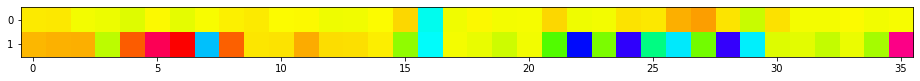

In [274]:
def rgbnorm(rgb):
    rgb -= rgb.min()
    rgb /= rgb.max()+0.01
    return rgb

spectrum_list = []
for task in tasks:
    policies = policy_list[task]    
    spectrum = np.stack([rgbnorm(policy) for policy in policies])
    spectrum = np.repeat(spectrum[np.newaxis,:,:],1,axis=0)
    spectrum_list.append(spectrum)
plt.figure(figsize=(16,2))
plt.imshow(np.concatenate(spectrum_list,axis=0))

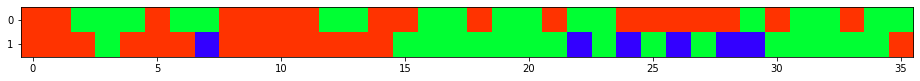

In [275]:
spectrum_list = []
for task in tasks:
    policies = policy_list[task]   
    idx = np.argmax(policies,axis=1)
    spectrum = np.zeros([len(idx),3])
    spectrum[np.arange(len(idx)),idx] = 1.0
    spectrum[np.arange(len(idx)),(idx+1)%3] = 0.2
    spectrum = np.repeat(spectrum[np.newaxis,:,:],1,axis=0)
    spectrum_list.append(spectrum)

plt.figure(figsize=(16,2))
plt.imshow(np.concatenate(spectrum_list,axis=0))

# Generate random policy

In [4]:
import random
from collections import OrderedDict
from scipy.special import softmax

In [5]:
state = torch.load('/mnt/nfs/work1/huiguan/lijunzhang/policymtl/checkpoint/NYUv2/' + 'alter_train_20000iter.model')
mtlmodel.load_state_dict(state['state_dict'], strict=False)

<All keys matched successfully>

In [6]:
policy_list = {'segment_semantic': [], 'normal':[], 'depth_zbuffer': []}
name_list = {'segment_semantic': [], 'normal':[], 'depth_zbuffer': []}
for name, param in mtlmodel.named_parameters():
    if 'policy' in name and not torch.eq(param, torch.tensor([0., 0., 0.]).cuda()).all():
        if 'segment_semantic' in name:
            policy_list['segment_semantic'].append(param.data.cpu().detach().numpy())
            name_list['segment_semantic'].append(name)
        elif 'depth_zbuffer' in name:
            policy_list['depth_zbuffer'].append(param.data.cpu().detach().numpy())
            name_list['depth_zbuffer'].append(name)
        elif 'normal' in name:
            policy_list['normal'].append(param.data.cpu().detach().numpy())
            name_list['normal'].append(name)

In [9]:
random.seed(98)

# shuffle from existed policy randomly
random_policy_dict = OrderedDict()
for task in tasks:
    temp = policy_list[task].copy()
    random.shuffle(temp)
    
    count = 0
    for name in name_list[task]:
        random_policy_dict[name] = torch.tensor(temp[count]).cuda()
        count += 1
random_state = {'state_dict': random_policy_dict}
torch.save(random_state, 'checkpoints/Cityscapes/' + 'random_policy_as_task_alter_train_13600iter_seed98.model')

In [76]:
torch.manual_seed(98)

# random initilization
random_policy_dict = OrderedDict()
for task in tasks:
    for name in name_list[task]:
        random_policy_dict[name] = torch.rand(3).cuda()
random_state = {'state_dict': random_policy_dict}
torch.save(random_state, 'checkpoints/Cityscapes/' + 'random_policy_seed98.model')

In [7]:
torch.manual_seed(98)

# The first 20 Conv to be shared
shared = 20
random_policy_dict = OrderedDict()
for task in tasks:
    count = 0
    for name in name_list[task]:
        if count < shared:
            random_policy_dict[name] = torch.tensor([1.0,0.0,0.0]).cuda()
        else:
            random_policy_dict[name] = torch.rand(3).cuda()
        count += 1
random_state = {'state_dict': random_policy_dict}
torch.save(random_state, '/mnt/nfs/work1/huiguan/lijunzhang/policymtl/checkpoint/NYUv2/' + 'random_policy_with_bottom20_shared_seed98.model')

In [13]:
torch.manual_seed(98)

# The first and last Conv to be shared as AdaShare
shared = 20
random_policy_dict = OrderedDict()
for task in tasks:
    count = 0
    for name in name_list[task]:
        if count in range(0,7):
            random_policy_dict[name] = torch.tensor([1.0,0.0,0.0]).cuda()
        elif count in range(14,24):
            random_policy_dict[name] = torch.tensor([1.0,0.0,0.0]).cuda()
        elif count in range(30,37):
            random_policy_dict[name] = torch.tensor([1.0,0.0,0.0]).cuda()
        else:
            random_policy_dict[name] = torch.rand(3).cuda()
        count += 1
random_state = {'state_dict': random_policy_dict}
torch.save(random_state, '/mnt/nfs/work1/huiguan/lijunzhang/policymtl/checkpoint/NYUv2/' + 'random_policy_as_AdaShare_seed98.model')

In [66]:
np.random.seed(98)

# sample from trained policy
sample_policy_dict = OrderedDict()
for task in tasks:
    for name, policy in zip(name_list[task], policy_list[task]):
        distribution = softmax(policy, axis=-1)
        choice = np.random.choice((0,1,2), p=distribution)
        if choice == 0:
            sample_policy_dict[name] = torch.tensor([1.0,0.0,0.0]).cuda()
        elif choice == 1:
            sample_policy_dict[name] = torch.tensor([0.0,1.0,0.0]).cuda()
        elif choice == 2:
            sample_policy_dict[name] = torch.tensor([0.0,0.0,1.0]).cuda()

In [52]:
# test
random_state = torch.load('checkpoints/Cityscapes/' + 'random_policy_seed98.model')
mtlmodel.load_state_dict(random_state['state_dict'],  strict=False)

_IncompatibleKeys(missing_keys=['headsDict.segment_semantic.fc1.conv1.weight', 'headsDict.segment_semantic.fc1.conv1.bias', 'headsDict.segment_semantic.fc1.conv2.weight', 'headsDict.segment_semantic.fc1.conv2.bias', 'headsDict.segment_semantic.fc1.conv3.weight', 'headsDict.segment_semantic.fc1.conv3.bias', 'headsDict.segment_semantic.fc2.conv1.weight', 'headsDict.segment_semantic.fc2.conv1.bias', 'headsDict.segment_semantic.fc2.conv2.weight', 'headsDict.segment_semantic.fc2.conv2.bias', 'headsDict.segment_semantic.fc2.conv3.weight', 'headsDict.segment_semantic.fc2.conv3.bias', 'headsDict.segment_semantic.fc3.conv1.weight', 'headsDict.segment_semantic.fc3.conv1.bias', 'headsDict.segment_semantic.fc3.conv2.weight', 'headsDict.segment_semantic.fc3.conv2.bias', 'headsDict.segment_semantic.fc3.conv3.weight', 'headsDict.segment_semantic.fc3.conv3.bias', 'headsDict.segment_semantic.fc4.conv1.weight', 'headsDict.segment_semantic.fc4.conv1.bias', 'headsDict.segment_semantic.fc4.conv2.weight', '

In [53]:
random_state

{'state_dict': OrderedDict([('net.0.policy.segment_semantic',
               tensor([0.8013, 0.9743, 0.0132], device='cuda:0')),
              ('net.4.policy.segment_semantic',
               tensor([0.1849, 0.2576, 0.4162], device='cuda:0')),
              ('net.7.policy.segment_semantic',
               tensor([0.5283, 0.6112, 0.3682], device='cuda:0')),
              ('net.11.policy.segment_semantic',
               tensor([0.8037, 0.5521, 0.1797], device='cuda:0')),
              ('net.14.policy.segment_semantic',
               tensor([0.5865, 0.1435, 0.1253], device='cuda:0')),
              ('net.18.policy.segment_semantic',
               tensor([0.0908, 0.2993, 0.4109], device='cuda:0')),
              ('net.21.policy.segment_semantic',
               tensor([0.0246, 0.2858, 0.5702], device='cuda:0')),
              ('net.25.policy.segment_semantic',
               tensor([0.7914, 0.7014, 0.4357], device='cuda:0')),
              ('net.27.policy.segment_semantic',
            

# Model parmas

In [7]:
state = torch.load('/mnt/nfs/work1/huiguan/lijunzhang/policymtl/checkpoint/NYUv2/' + 'sample_bottom20_loss_lambda/20-10/sample_policy_seed10.model')
mtlmodel.load_state_dict(state['state_dict'], strict=False)

_IncompatibleKeys(missing_keys=['headsDict.segment_semantic.fc1.conv1.weight', 'headsDict.segment_semantic.fc1.conv1.bias', 'headsDict.segment_semantic.fc1.conv2.weight', 'headsDict.segment_semantic.fc1.conv2.bias', 'headsDict.segment_semantic.fc1.conv3.weight', 'headsDict.segment_semantic.fc1.conv3.bias', 'headsDict.segment_semantic.fc2.conv1.weight', 'headsDict.segment_semantic.fc2.conv1.bias', 'headsDict.segment_semantic.fc2.conv2.weight', 'headsDict.segment_semantic.fc2.conv2.bias', 'headsDict.segment_semantic.fc2.conv3.weight', 'headsDict.segment_semantic.fc2.conv3.bias', 'headsDict.segment_semantic.fc3.conv1.weight', 'headsDict.segment_semantic.fc3.conv1.bias', 'headsDict.segment_semantic.fc3.conv2.weight', 'headsDict.segment_semantic.fc3.conv2.bias', 'headsDict.segment_semantic.fc3.conv3.weight', 'headsDict.segment_semantic.fc3.conv3.bias', 'headsDict.segment_semantic.fc4.conv1.weight', 'headsDict.segment_semantic.fc4.conv1.bias', 'headsDict.segment_semantic.fc4.conv2.weight', '

In [9]:
name_list = ['segment_semantic','normal','depth_zbuffer']

singleParam = 0
mtlParam = 0
for node in mtlmodel.net:
    if node.taskSp and not node.assumeSp:
        shared = False
        
        params = node.basicOp.weight.data.nelement()
        if node.basicOp.bias is not None:
            params += node.basicOp.bias.data.nelement()
        singleParam += params
        
        for task in name_list:
            policy = node.policy[task].data.cpu().detach().numpy()
            if np.array_equal(policy, np.array([1.,0.,0.])):
                if not shared:
                    mtlParam += params
                    shared = True
            elif np.array_equal(policy, np.array([0.,1.,0.])):
                mtlParam += params

In [11]:
mtlParam / (singleParam * len(name_list)) - 1

-0.45198967621305997

# Policy layer-wise training

In [4]:
class Trainer2(Trainer):
    def __init__(self, model, train_dataloader_dict, val_dataloader_dict, criterion_dict, metric_dict, 
                 print_iters=50, val_iters=2000, save_iters=200, policy_update_iters=100, next_policy_iters=200):
        super(Trainer2, self).__init__(model, train_dataloader_dict, val_dataloader_dict, criterion_dict, metric_dict, 
                 print_iters, val_iters, save_iters, policy_update_iters)
        self.next_policy_iters = next_policy_iters
        
    def layerwise_policy_train(self, iters, task_iters=None, policy_lr=0.01, network_lr=0.0001, 
                               start_tau=5, tau_ratio=0.965,
                               policy_scale=6, loss_lambda=1.0,
                               writerPath=None, savePath=None, reload=None):
        self.model.train()
        if writerPath != None:
            writer = SummaryWriter(log_dir=writerPath+'layerwise_policy_train/')
        else:
            writer = None
        
        # Step 1: Set optimizer
        self.freeze_policy()
        optimizer = torch.optim.SGD([{'params': filter(lambda p: p.requires_grad==False, self.model.parameters()), 'lr': policy_lr},
                            {'params': filter(lambda p: p.requires_grad, self.model.parameters()), 'lr': network_lr}],
                                    momentum=0.9, weight_decay=1e-4)
        self.unfreeze_all_weights()
        
        start = 0
        policy_idx = self.model.next_policy_idx(-1)
        tau = start_tau
        if reload is not None and savePath is not None:
            state = torch.load(savePath + reload)
            self.model.load_state_dict(state['state_dict'])
            if 'layerwise_policy_train' in reload:
#                 optimizer.load_state_dict(state['optimizer'])
                start = state['iter'] + 1 
                policy_idx = state['policy_idx']
                tau = state['tau']
            
        ######################################################################################
#         self.model.transfer_weight_after_pretrain() # copy backbone weights to specific weights
        ######################################################################################
        
        # Step 2: Set task training iters and policy_update_iters
        if task_iters is None or len(task_iters) != len(self.tasks):
            task_iters = tuple([100] * len(self.tasks))
#         self.policy_update_iters = sum(task_iters)
        
        for i in range(start, iters):
            # Step 3: Check whether to train the next policy 
            if tau < 1e-2: # For fixed-layerwise
#             if (i+1) % self.next_policy_iters == 0 and policy_idx < self.model.max_policy_idx(): # For Adashare-layerwise
                # Fixed the current policy parameters # For fixed-layerwise
                self.freeze_layerwise_policy(policy_idx) 
                print('current policy:')
                for task in self.tasks:
                    print('task: ' + task)
                    print(self.model.current_policy(policy_idx,task))

                # Go to the next policy idx
                policy_idx = self.model.next_policy_idx(policy_idx)
                print('policy_idx change to: ' + str(policy_idx))
                # Reset tau
                tau = start_tau # For fixed-layerwise
            
            # Step 4: Train network and policy jointly
            #         Train tasks alternatively
            task_idx = self.which_task(i, task_iters)
            self.train_step_task_with_reg('layerwise_policy_train', self.tasks[task_idx], optimizer,tau=tau, 
                                          policy_idx=policy_idx, scale=policy_scale, loss_lambda=loss_lambda)

            # Step 5: Update tau in policy every self.policy_update_iters
            #         If reach the end of the model, don't update anymore
            if (i+1) % self.policy_update_iters == 0 and policy_idx < self.model.max_policy_idx(): # For fixed-layerwise
#             if (i+1) % self.policy_update_iters == 0 and tau > 1e-6: # For Adashare-layerwise
                tau = tau * tau_ratio
                print('tau: ' + str(tau))

            # Step 6: Print loss
            if (i+1) % self.print_iters == 0:
                self.print_train_loss_with_reg(i, writer)
                self.reset_train_loss()
            
            # Step 7: Validation
            if (i+1) % self.val_iters == 0:
                self.validate('layerwise_policy_train', i, tau=tau, hard=True, writer=writer, policy_idx=policy_idx)
                self.model.train()
                
            # Step 8: Save model
            if (i+1) % self.save_iters == 0:
                if savePath is not None:
                    state = {'iter': i,
                            'state_dict': self.model.state_dict(),
                            'optimizer': optimizer.state_dict(),
                            'tau': tau,
                            'policy_idx': policy_idx}
                    self.save_model(state, 'layerwise_policy_train', savePath)
                    
        # Reset loss list and the data iters
        self.set_train_loss_data_iter()
        return
    
    def task_alter_train_with_reg(self, iters, task_iters=None, policy_lr=0.01, network_lr=0.0001, 
                                   tau=5, tau_ratio=0.965,
                                   policy_scale=6, loss_lambda=1.0, 
                                   writerPath=None, savePath=None, reload=None):
        self.model.train()
        if writerPath != None:
            writer = SummaryWriter(log_dir=writerPath+'task_alter_train/')
        else:
            writer = None
        
        # Step 1: Set optimizer
        self.freeze_policy()
        optimizer = torch.optim.SGD([{'params': filter(lambda p: p.requires_grad==False, self.model.parameters()), 'lr': policy_lr},
                                     {'params': filter(lambda p: p.requires_grad, self.model.parameters()), 'lr': network_lr}],
                                      momentum=0.9, weight_decay=1e-4)
        self.unfreeze_all_weights()
        
        start = 0
        if reload is not None and savePath is not None:
            state = torch.load(savePath + reload)
            self.model.load_state_dict(state['state_dict'])
            if 'task_alter_train' in reload:
#                 optimizer.load_state_dict(state['optimizer'])
                tau = state['tau']
                start = state['iter'] + 1 
        
        # Step 2: Set task training iters
        if task_iters is None or len(task_iters) != len(self.tasks):
            task_iters = tuple([100] * len(self.tasks))
        
        for i in range(start, iters):
            # Step 2-1: Train network and policy jointly
            task_idx = self.which_task(i, task_iters)
            self.train_step_task_with_reg('mtl', self.tasks[task_idx], optimizer, tau=tau, scale=policy_scale, loss_lambda=loss_lambda)

            # Step 3: Update tau in policy every self.policy_update_iters
            if (i+1) % self.policy_update_iters == 0 and tau > 1e-6:
                tau = tau * 0.965
                print('tau: ' + str(tau))
                count = 0
                for name, param in self.model.named_parameters():
                    if 'policy' in name and count < 16 and not self.model.net[int(name.split('.')[1])].assumeSp:
                        print(name, param)
                        count += 1

            # Step 4: Print loss
            if (i+1) % self.print_iters == 0:
                self.print_train_loss_with_reg(i, writer)
                self.reset_train_loss()
            
            # Step 5: Validation
            if (i+1) % self.val_iters == 0:
                self.validate('mtl', i, tau=tau, hard=True, writer=writer)
                self.model.train()
                
            # Step 6: Save model
            if (i+1) % self.save_iters == 0:
                if savePath is not None:
                    state = {'iter': i,
                            'state_dict': self.model.state_dict(),
                            'optimizer': optimizer.state_dict(),
                            'tau': tau}
                    self.save_model(state, 'task_alter_train', savePath)
                    
        # Reset loss list and the data iters
        self.set_train_loss_data_iter()
        return
    
    def alter_train_with_reg(self, iters, network_policy_iters=(400,100), policy_lr=0.01, network_lr=0.0001, 
                             tau=5, tau_ratio=0.965,
                             policy_scale=6, loss_lambda=1.0,
                             writerPath=None, savePath=None, reload=None):
        self.model.train()
        # Key point: set two optimizers, one for the model, one for the policy
        if writerPath != None:
            writer = SummaryWriter(log_dir=writerPath+'alter_train/')
        else:
            writer = None
        
        # Step 1: Get the two optimizers for network and policy respectively
        self.freeze_policy()
        policy_op = torch.optim.Adam(filter(lambda p: p.requires_grad==False, self.model.parameters()), lr=policy_lr, weight_decay=5*1e-4)
        network_op = torch.optim.SGD(filter(lambda p: p.requires_grad, self.model.parameters()), lr=network_lr, momentum=0.9, weight_decay=1e-4)
        self.unfreeze_all_weights()
        start = 0
        if reload is not None and savePath is not None:
            state = torch.load(savePath + reload)
            self.model.load_state_dict(state['state_dict'])
            if 'alter_train' in reload:
#                 policy_op.load_state_dict(state['policy_op'])
#                 network_op.load_state_dict(state['network_op'])
                tau = state['tau']
                start = state['iter'] + 1       
        
        # Step 2: Train network and policy alternatively
        policy_count = 0
        for i in range(start, iters):
            # Step 2-1: Train network when the current iter is in the first part of network_policy_iters
            if i % (network_policy_iters[0] + network_policy_iters[1]) in range(network_policy_iters[0]):
                self.train_step_with_reg('mtl', network_op, tau=tau, scale=policy_scale, loss_lambda=loss_lambda)

#                 print('Train Network:')
#                 self.print_train_loss(i, writer)

            # Step 2-2: Train policy when the current iter is in the second part of network_policy_iters
            else:
                self.train_step_with_reg('mtl', policy_op, tau=tau,loss_lambda=loss_lambda)
                policy_count += 1

#                 print('Train Policy:')
#                 self.print_train_loss(i, writer)

            # Step 3: Update tau in policy every self.policy_update_iters
            if policy_count > self.policy_update_iters and tau > 1e-6:
                tau = tau * tau_ratio
                print('tau: ' + str(tau))
                policy_count = 0

            # Step 4: Print loss
            if (i+1) % self.print_iters == 0:
                self.print_train_loss_with_reg(i, writer)
                self.reset_train_loss()
            
            # Step 5: Validation
            if (i+1) % self.val_iters == 0:
                self.validate('mtl', i, tau=tau, writer=writer)
                self.model.train()
                
            # Step 6: Save model
            if (i+1) % self.save_iters == 0:
                if savePath is not None:
                    state = {'iter': i,
                            'state_dict': self.model.state_dict(),
                            'policy_op': policy_op.state_dict(),
                            'network_op': network_op.state_dict(),
                            'tau': tau}
                    self.save_model(state, 'alter_train', savePath)
                    
        # Reset loss list and the data iters
        self.set_train_loss_data_iter()
        return
    
    # Helper Functions
    def train_step_with_reg(self, stage, optimizer, schedular=None, 
                            tau=1, hard=False, 
                            policy_idx=None, scale=6, loss_lambda=1.0):
        # Function: Train one iter for each task 
        for task in self.tasks:
            try:
                data = next(self.train_iter_dict[task])
            except StopIteration:
                self.train_iter_dict[task] = iter(self.train_dataloader_dict[task])
                continue
            except:
                continue
                
            x = data['input'].cuda()
            y = data['label'].cuda()

            optimizer.zero_grad()
            output = self.model(x, stage, task, tau, hard, policy_idx)
            if 'mask' in data:
                tloss = self.criterion_dict[task](output, y, data['mask'].cuda())
            else:
                tloss = self.criterion_dict[task](output, y)
            
            regloss = self.model.policy_reg(task, policy_idx, tau, scale) # For fixed-layerwise
#             regloss = self.model.policy_reg_so_far(task, policy_idx, tau, scale) # For Adashare-layerwise
            if isinstance(loss_lambda, dict):
                loss = loss_lambda[task] * tloss + loss_lambda['policy'] * regloss
            elif isinstance(loss_lambda, float):
                loss = tloss + loss_lambda * regloss
            else:
                sys.exit('Loss weights (lambda) should be in the type of dictionary or float.')
            
            loss.backward()
            optimizer.step()
            self.loss_list[task].append((tloss.item(), regloss.item(), loss.item()))  
            
        if schedular is not None:
            scheduler.step()
        return
    
    def train_step_task_with_reg(self, stage, task, optimizer, schedular=None, 
                                 tau=1, hard=False, 
                                 policy_idx=None, scale=6, loss_lambda=1.0):
        # Function: Train one iter for one task 
        try:
            data = next(self.train_iter_dict[task])
        except StopIteration:
            self.train_iter_dict[task] = iter(self.train_dataloader_dict[task])
            return
        except:
            return

        x = data['input'].cuda()
        y = data['label'].cuda()

        optimizer.zero_grad()
        output = self.model(x, stage, task, tau, hard, policy_idx)
        if 'mask' in data:
            tloss = self.criterion_dict[task](output, y, data['mask'].cuda())
        else:
            tloss = self.criterion_dict[task](output, y)
        
        regloss = self.model.policy_reg(task, policy_idx, tau, scale)
        if isinstance(loss_lambda, dict):
            loss = loss_lambda[task] * tloss + loss_lambda['policy'] * regloss
        elif isinstance(loss_lambda, float):
            loss = tloss + loss_lambda * regloss
        else:
            sys.exit('Loss weights (lambda) should be in the type of dictionary or float.')
        loss.backward()
        optimizer.step()
        
        self.loss_list[task].append((tloss.item(), regloss.item(), loss.item()))  
            
        if schedular is not None:
            scheduler.step()
        return
    
    def print_train_loss_with_reg(self, it, writer=None):
        # Function: Print loss for each task
        total_loss = 0
        task_num = 0
        
        for task in self.tasks:
            if self.loss_list[task]:
                avg_tloss = np.mean([x[0] for x in self.loss_list[task]])
                avg_regloss = np.mean([x[1] for x in self.loss_list[task]])
                avg_loss = np.mean([x[2] for x in self.loss_list[task]])
            else:
                continue
            total_loss += avg_loss
            task_num += 1
            if writer != None:
                writer.add_scalar('Loss/train/' + task, avg_loss, it)
            print('[Iter {} Task {}] Task Loss: {:.4f} Reg Loss: {:.4f} Train Loss: {:.4f}'.format((it+1), task[:4], avg_tloss, avg_regloss, avg_loss), flush=True)
        print('[Iter {} Total] Train Loss: {:.4f}'.format((it+1), total_loss/task_num), flush=True)
        print('======================================================================', flush=True)
        return

In [5]:
trainer = Trainer2(mtlmodel, trainDataloaderDict, valDataloaderDict, criterionDict, metricDict, 
                   val_iters=200, print_iters=200, policy_update_iters=100, next_policy_iters=1000)

In [6]:
# Adashare style
loss_lambda = {'segment_semantic': 1, 'depth_zbuffer': 1, 'policy':0.01}
trainer.layerwise_policy_train(iters=50000, task_iters=(10,200), policy_lr=0.01, network_lr=0.0001, tau_ratio=0.965, loss_lambda=loss_lambda,
                               savePath='checkpoints/Cityscapes_re/', reload='pre_train_24000iter.model')

tau: 4.825
tau: 4.656125
[Iter 200 Task segm] Task Loss: 0.6813 Reg Loss: 0.2937 Train Loss: 0.6842
[Iter 200 Task dept] Task Loss: 0.0209 Reg Loss: 0.2533 Train Loss: 0.0234
[Iter 200 Total] Train Loss: 0.3538
[Iter 200 Task segm] Val Loss: 0.6928
{'mIoU': 0.5202, 'Pixel Acc': 0.6935, 'cmp': 0.1113}
[Iter 200 Task dept] Val Loss: 0.0296
{'abs_err': 0.0344, 'rel_err': 0.41, 'sigma_1.25': 42.4208, 'sigma_1.25^2': 71.2166, 'sigma_1.25^3': 82.9887, 'cmp': -0.3899}
tau: 4.493160625
tau: 4.3359000031249995
[Iter 400 Task segm] Task Loss: 0.6980 Reg Loss: 0.2512 Train Loss: 0.7005
[Iter 400 Task dept] Task Loss: 0.0211 Reg Loss: 0.2797 Train Loss: 0.0239
[Iter 400 Total] Train Loss: 0.3622
[Iter 400 Task segm] Val Loss: 0.6911
{'mIoU': 0.521, 'Pixel Acc': 0.6943, 'cmp': 0.1128}
[Iter 400 Task dept] Val Loss: 0.0290
{'abs_err': 0.0338, 'rel_err': 0.4015, 'sigma_1.25': 44.237, 'sigma_1.25^2': 72.3982, 'sigma_1.25^3': 84.1059, 'cmp': -0.3671}
tau: 4.184143503015624
tau: 4.037698480410078
[Iter 

tau: 1.9107658228490005
tau: 1.8438890190492854
[Iter 2800 Task segm] Task Loss: 0.6382 Reg Loss: 0.4251 Train Loss: 0.6425
[Iter 2800 Task dept] Task Loss: 0.0212 Reg Loss: 0.3016 Train Loss: 0.0242
[Iter 2800 Total] Train Loss: 0.3333
[Iter 2800 Task segm] Val Loss: 0.6963
{'mIoU': 0.5236, 'Pixel Acc': 0.6883, 'cmp': 0.112}
[Iter 2800 Task dept] Val Loss: 0.0314
{'abs_err': 0.0361, 'rel_err': 0.4199, 'sigma_1.25': 40.9986, 'sigma_1.25^2': 68.6831, 'sigma_1.25^3': 81.3958, 'cmp': -0.4283}
tau: 1.7793529033825604
policy_idx change to: 11
tau: 1.7170755517641707
[Iter 3000 Task segm] Task Loss: 0.6676 Reg Loss: 0.5155 Train Loss: 0.6727
[Iter 3000 Task dept] Task Loss: 0.0208 Reg Loss: 0.3087 Train Loss: 0.0239
[Iter 3000 Total] Train Loss: 0.3483
[Iter 3000 Task segm] Val Loss: 0.7548
{'mIoU': 0.5052, 'Pixel Acc': 0.6714, 'cmp': 0.0777}
[Iter 3000 Task dept] Val Loss: 0.0343
{'abs_err': 0.0389, 'rel_err': 0.4375, 'sigma_1.25': 35.8847, 'sigma_1.25^2': 66.8012, 'sigma_1.25^3': 80.2697, 

tau: 0.7566893325943664
tau: 0.7302052059535636
[Iter 5400 Task segm] Task Loss: 0.6720 Reg Loss: 0.4058 Train Loss: 0.6760
[Iter 5400 Task dept] Task Loss: 0.0208 Reg Loss: 0.3733 Train Loss: 0.0246
[Iter 5400 Total] Train Loss: 0.3503
[Iter 5400 Task segm] Val Loss: 0.6916
{'mIoU': 0.5319, 'Pixel Acc': 0.6931, 'cmp': 0.1255}
[Iter 5400 Task dept] Val Loss: 0.0265
{'abs_err': 0.0307, 'rel_err': 0.3821, 'sigma_1.25': 50.9987, 'sigma_1.25^2': 75.7859, 'sigma_1.25^3': 86.8668, 'cmp': -0.2855}
tau: 0.7046480237451889
tau: 0.6799853429141073
[Iter 5600 Task segm] Task Loss: 0.6835 Reg Loss: 0.5117 Train Loss: 0.6886
[Iter 5600 Task dept] Task Loss: 0.0210 Reg Loss: 0.3884 Train Loss: 0.0249
[Iter 5600 Total] Train Loss: 0.3568
[Iter 5600 Task segm] Val Loss: 0.6874
{'mIoU': 0.5326, 'Pixel Acc': 0.6962, 'cmp': 0.1285}
[Iter 5600 Task dept] Val Loss: 0.0272
{'abs_err': 0.0315, 'rel_err': 0.3855, 'sigma_1.25': 49.5003, 'sigma_1.25^2': 75.0749, 'sigma_1.25^3': 86.2862, 'cmp': -0.305}
tau: 0.65

{'abs_err': 0.0343, 'rel_err': 0.4022, 'sigma_1.25': 43.2896, 'sigma_1.25^2': 72.4604, 'sigma_1.25^3': 84.6234, 'cmp': -0.3744}
tau: 0.29965929849445305
policy_idx change to: 27
tau: 0.2891712230471472
[Iter 8000 Task segm] Task Loss: 0.6449 Reg Loss: 0.3172 Train Loss: 0.6481
[Iter 8000 Task dept] Task Loss: 0.0209 Reg Loss: 0.3684 Train Loss: 0.0246
[Iter 8000 Total] Train Loss: 0.3363
[Iter 8000 Task segm] Val Loss: 0.6806
{'mIoU': 0.4596, 'Pixel Acc': 0.6922, 'cmp': 0.0349}
[Iter 8000 Task dept] Val Loss: 0.0319
{'abs_err': 0.0365, 'rel_err': 0.4149, 'sigma_1.25': 38.9431, 'sigma_1.25^2': 69.8393, 'sigma_1.25^3': 82.7661, 'cmp': -0.431}
tau: 0.279050230240497
tau: 0.2692834721820796
[Iter 8200 Task segm] Task Loss: 0.6860 Reg Loss: 0.5178 Train Loss: 0.6912
[Iter 8200 Task dept] Task Loss: 0.0210 Reg Loss: 0.4125 Train Loss: 0.0251
[Iter 8200 Total] Train Loss: 0.3581
[Iter 8200 Task segm] Val Loss: 0.6790
{'mIoU': 0.4652, 'Pixel Acc': 0.6942, 'cmp': 0.0432}
[Iter 8200 Task dept] V

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/lijunzhang/anaconda3/envs/multitask/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-083f305b849b>", line 3, in <module>
    savePath='checkpoints/Cityscapes_re/', reload='pre_train_24000iter.model')
  File "<ipython-input-4-26b7f59cd536>", line 67, in layerwise_policy_train
    policy_idx=policy_idx, scale=policy_scale, loss_lambda=loss_lambda)
  File "<ipython-input-4-26b7f59cd536>", line 245, in train_step_task_with_reg
    optimizer.step()
  File "/home/lijunzhang/anaconda3/envs/multitask/lib/python3.6/site-packages/torch/autograd/grad_mode.py", line 15, in decorate_context
    return func(*args, **kwargs)
  File "/home/lijunzhang/anaconda3/envs/multitask/lib/python3.6/site-packages/torch/optim/sgd.py", line 106, in step
    buf.mul_(momentum).add_(d_p, alpha=1 - dampening)
KeyboardInterrupt

During handling of the abov

KeyboardInterrupt: 

In [13]:
# Fixed policy style
loss_lambda = {'segment_semantic': 1, 'depth_zbuffer': 1, 'policy':0.001}
trainer.layerwise_policy_train(iters=50000, task_iters=(10,200),policy_lr=0.01, network_lr=0.0001, tau_ratio=0.965, loss_lambda=loss_lambda,
                               savePath='checkpoints/Cityscapes_re2/', reload='pre_train_24000iter.model')

KeyboardInterrupt: 

In [ ]:
# Task alter-train with reg - on whole training set
loss_lambda = {'segment_semantic': 1, 'depth_zbuffer': 1, 'policy':0.00}
trainer.task_alter_train_with_reg(iters=20000, task_iters=(100,100),policy_lr=0.01, network_lr=0.0001, 
                                  tau=5, tau_ratio=0.965, loss_lambda=loss_lambda,
                                  savePath='checkpoints/Cityscapes/', reload='pre_train_72000iter.model')

tau: 4.825
net.0.policy.segment_semantic Parameter containing:
tensor([0.9620, 1.0361], device='cuda:0', requires_grad=True)
net.0.policy.depth_zbuffer Parameter containing:
tensor([1., 1.], device='cuda:0', requires_grad=True)
net.4.policy.segment_semantic Parameter containing:
tensor([0.9792, 1.0190], device='cuda:0', requires_grad=True)
net.4.policy.depth_zbuffer Parameter containing:
tensor([1., 1.], device='cuda:0', requires_grad=True)
net.7.policy.segment_semantic Parameter containing:
tensor([0.9859, 1.0123], device='cuda:0', requires_grad=True)
net.7.policy.depth_zbuffer Parameter containing:
tensor([1., 1.], device='cuda:0', requires_grad=True)
net.11.policy.segment_semantic Parameter containing:
tensor([0.9894, 1.0088], device='cuda:0', requires_grad=True)
net.11.policy.depth_zbuffer Parameter containing:
tensor([1., 1.], device='cuda:0', requires_grad=True)
net.14.policy.segment_semantic Parameter containing:
tensor([0.9871, 1.0111], device='cuda:0', requires_grad=True)
net.

{'abs_err': 0.0349, 'rel_err': 0.6381, 'sigma_1.25': 48.298, 'sigma_1.25^2': 68.6314, 'sigma_1.25^3': 79.952, 'cmp': -0.5298}
tau: 4.184143503015624
net.0.policy.segment_semantic Parameter containing:
tensor([0.8971, 1.0931], device='cuda:0', requires_grad=True)
net.0.policy.depth_zbuffer Parameter containing:
tensor([0.9957, 0.9965], device='cuda:0', requires_grad=True)
net.4.policy.segment_semantic Parameter containing:
tensor([0.9375, 1.0528], device='cuda:0', requires_grad=True)
net.4.policy.depth_zbuffer Parameter containing:
tensor([0.9962, 0.9961], device='cuda:0', requires_grad=True)
net.7.policy.segment_semantic Parameter containing:
tensor([0.9563, 1.0340], device='cuda:0', requires_grad=True)
net.7.policy.depth_zbuffer Parameter containing:
tensor([0.9959, 0.9963], device='cuda:0', requires_grad=True)
net.11.policy.segment_semantic Parameter containing:
tensor([0.9679, 1.0223], device='cuda:0', requires_grad=True)
net.11.policy.depth_zbuffer Parameter containing:
tensor([0.9

[Iter 800 Total] Train Loss: 0.2115
[Iter 800 Task segm] Val Loss: 3.9510
{'mIoU': 0.1427, 'Pixel Acc': 0.4138, 'cmp': -0.5456}
[Iter 800 Task dept] Val Loss: 0.0535
{'abs_err': 0.0502, 'rel_err': 1.1976, 'sigma_1.25': 39.2014, 'sigma_1.25^2': 58.7068, 'sigma_1.25^3': 70.0101, 'cmp': -1.1187}


In [7]:
# Task alter-train with reg - on training set 2, only has 595 inputs
loss_lambda = {'segment_semantic': 1, 'depth_zbuffer': 20, 'policy':0.00}
trainer.task_alter_train_with_reg(iters=20000, task_iters=(100,100),policy_lr=0.01, network_lr=0.001, 
                                  tau=5, tau_ratio=0.965, loss_lambda=loss_lambda,
                                  savePath='checkpoints/Cityscapes_re/', reload='pre_train_24000iter.model')

tau: 4.825
net.0.policy.segment_semantic Parameter containing:
tensor([0.4541, 0.5450], device='cuda:0', requires_grad=True)
net.0.policy.depth_zbuffer Parameter containing:
tensor([0.5000, 0.5000], device='cuda:0', requires_grad=True)
net.4.policy.segment_semantic Parameter containing:
tensor([0.4783, 0.5208], device='cuda:0', requires_grad=True)
net.4.policy.depth_zbuffer Parameter containing:
tensor([0.5000, 0.5000], device='cuda:0', requires_grad=True)
net.7.policy.segment_semantic Parameter containing:
tensor([0.4927, 0.5064], device='cuda:0', requires_grad=True)
tau: 4.656125
net.0.policy.segment_semantic Parameter containing:
tensor([0.4521, 0.5461], device='cuda:0', requires_grad=True)
net.0.policy.depth_zbuffer Parameter containing:
tensor([0.4987, 0.5004], device='cuda:0', requires_grad=True)
net.4.policy.segment_semantic Parameter containing:
tensor([0.4764, 0.5217], device='cuda:0', requires_grad=True)
net.4.policy.depth_zbuffer Parameter containing:
tensor([0.4985, 0.5006]

[Iter 1000 Task dept] Task Loss: 0.0228 Reg Loss: 10.0611 Train Loss: 0.0228
[Iter 1000 Total] Train Loss: 0.3309
[Iter 1000 Task segm] Val Loss: 0.8607
{'mIoU': 0.3836, 'Pixel Acc': 0.6399, 'cmp': -0.0945}
[Iter 1000 Task dept] Val Loss: 0.0264
{'abs_err': 0.0277, 'rel_err': 0.4331, 'sigma_1.25': 56.6233, 'sigma_1.25^2': 75.4476, 'sigma_1.25^3': 85.2392, 'cmp': -0.2693}
tau: 3.3788619727887768
net.0.policy.segment_semantic Parameter containing:
tensor([0.3683, 0.6211], device='cuda:0', requires_grad=True)
net.0.policy.depth_zbuffer Parameter containing:
tensor([0.4905, 0.4999], device='cuda:0', requires_grad=True)
net.4.policy.segment_semantic Parameter containing:
tensor([0.4413, 0.5481], device='cuda:0', requires_grad=True)
net.4.policy.depth_zbuffer Parameter containing:
tensor([0.4912, 0.4992], device='cuda:0', requires_grad=True)
net.7.policy.segment_semantic Parameter containing:
tensor([0.4754, 0.5140], device='cuda:0', requires_grad=True)
tau: 3.2606018037411695
net.0.policy.s

[Iter 2000 Task dept] Task Loss: 0.0273 Reg Loss: 10.7401 Train Loss: 0.0273
[Iter 2000 Total] Train Loss: 0.3084
[Iter 2000 Task segm] Val Loss: 0.8643
{'mIoU': 0.3737, 'Pixel Acc': 0.6264, 'cmp': -0.116}
[Iter 2000 Task dept] Val Loss: 0.0307
{'abs_err': 0.0284, 'rel_err': 0.4758, 'sigma_1.25': 58.2884, 'sigma_1.25^2': 76.3268, 'sigma_1.25^3': 85.9661, 'cmp': -0.2952}
tau: 2.366157146354003
net.0.policy.segment_semantic Parameter containing:
tensor([0.2924, 0.6875], device='cuda:0', requires_grad=True)
net.0.policy.depth_zbuffer Parameter containing:
tensor([0.4796, 0.5012], device='cuda:0', requires_grad=True)
net.4.policy.segment_semantic Parameter containing:
tensor([0.4296, 0.5502], device='cuda:0', requires_grad=True)
net.4.policy.depth_zbuffer Parameter containing:
tensor([0.4815, 0.4992], device='cuda:0', requires_grad=True)
net.7.policy.segment_semantic Parameter containing:
tensor([0.4792, 0.5006], device='cuda:0', requires_grad=True)
tau: 2.2833416462316127
net.0.policy.seg

[Iter 3000 Task dept] Task Loss: 0.0251 Reg Loss: 11.3203 Train Loss: 0.0251
[Iter 3000 Total] Train Loss: 0.3017
[Iter 3000 Task segm] Val Loss: 1.2400
{'mIoU': 0.3149, 'Pixel Acc': 0.5226, 'cmp': -0.2586}
[Iter 3000 Task dept] Val Loss: 0.0261
{'abs_err': 0.026, 'rel_err': 0.4217, 'sigma_1.25': 59.4553, 'sigma_1.25^2': 77.1608, 'sigma_1.25^3': 86.7288, 'cmp': -0.2274}
tau: 1.6569779074524247
net.0.policy.segment_semantic Parameter containing:
tensor([0.2356, 0.7347], device='cuda:0', requires_grad=True)
net.0.policy.depth_zbuffer Parameter containing:
tensor([0.4677, 0.5036], device='cuda:0', requires_grad=True)
net.4.policy.segment_semantic Parameter containing:
tensor([0.4176, 0.5527], device='cuda:0', requires_grad=True)
net.4.policy.depth_zbuffer Parameter containing:
tensor([0.4710, 0.5003], device='cuda:0', requires_grad=True)
net.7.policy.segment_semantic Parameter containing:
tensor([0.4879, 0.4824], device='cuda:0', requires_grad=True)
tau: 1.5989836806915898
net.0.policy.se

[Iter 4000 Task dept] Task Loss: 0.0226 Reg Loss: 12.5245 Train Loss: 0.0226
[Iter 4000 Total] Train Loss: 0.2904
[Iter 4000 Task segm] Val Loss: 1.1975
{'mIoU': 0.3152, 'Pixel Acc': 0.5551, 'cmp': -0.2364}
[Iter 4000 Task dept] Val Loss: 0.0420
{'abs_err': 0.0378, 'rel_err': 0.6206, 'sigma_1.25': 49.8039, 'sigma_1.25^2': 72.0543, 'sigma_1.25^3': 82.3852, 'cmp': -0.5353}
tau: 1.1603522572522524
net.0.policy.segment_semantic Parameter containing:
tensor([0.1822, 0.7787], device='cuda:0', requires_grad=True)
net.0.policy.depth_zbuffer Parameter containing:
tensor([0.4567, 0.5052], device='cuda:0', requires_grad=True)
net.4.policy.segment_semantic Parameter containing:
tensor([0.4177, 0.5432], device='cuda:0', requires_grad=True)
net.4.policy.depth_zbuffer Parameter containing:
tensor([0.4609, 0.5009], device='cuda:0', requires_grad=True)
net.7.policy.segment_semantic Parameter containing:
tensor([0.5066, 0.4543], device='cuda:0', requires_grad=True)
tau: 1.1197399282484235
net.0.policy.s

[Iter 5000 Task dept] Task Loss: 0.0237 Reg Loss: 13.4679 Train Loss: 0.0237
[Iter 5000 Total] Train Loss: 0.2822
[Iter 5000 Task segm] Val Loss: 1.7550
{'mIoU': 0.306, 'Pixel Acc': 0.5433, 'cmp': -0.2558}
[Iter 5000 Task dept] Val Loss: 0.0268
{'abs_err': 0.0266, 'rel_err': 0.4306, 'sigma_1.25': 58.0349, 'sigma_1.25^2': 74.5632, 'sigma_1.25^3': 84.1738, 'cmp': -0.2561}
tau: 0.8125741175273071
net.0.policy.segment_semantic Parameter containing:
tensor([0.1454, 0.8062], device='cuda:0', requires_grad=True)
net.0.policy.depth_zbuffer Parameter containing:
tensor([0.4400, 0.5125], device='cuda:0', requires_grad=True)
net.4.policy.segment_semantic Parameter containing:
tensor([0.4261, 0.5255], device='cuda:0', requires_grad=True)
net.4.policy.depth_zbuffer Parameter containing:
tensor([0.4507, 0.5018], device='cuda:0', requires_grad=True)
net.7.policy.segment_semantic Parameter containing:
tensor([0.5305, 0.4211], device='cuda:0', requires_grad=True)
tau: 0.7841340234138513
net.0.policy.se

[Iter 6000 Task dept] Task Loss: 0.0228 Reg Loss: 14.4797 Train Loss: 0.0228
[Iter 6000 Total] Train Loss: 0.2698
[Iter 6000 Task segm] Val Loss: 1.3788
{'mIoU': 0.2693, 'Pixel Acc': 0.4947, 'cmp': -0.3339}
[Iter 6000 Task dept] Val Loss: 0.0451
{'abs_err': 0.0396, 'rel_err': 0.6313, 'sigma_1.25': 46.8049, 'sigma_1.25^2': 72.519, 'sigma_1.25^3': 83.3964, 'cmp': -0.5686}
tau: 0.5690312509399826
net.0.policy.segment_semantic Parameter containing:
tensor([0.0848, 0.8575], device='cuda:0', requires_grad=True)
net.0.policy.depth_zbuffer Parameter containing:
tensor([0.4285, 0.5148], device='cuda:0', requires_grad=True)
net.4.policy.segment_semantic Parameter containing:
tensor([0.4133, 0.5291], device='cuda:0', requires_grad=True)
net.4.policy.depth_zbuffer Parameter containing:
tensor([0.4417, 0.5016], device='cuda:0', requires_grad=True)
net.7.policy.segment_semantic Parameter containing:
tensor([0.5400, 0.4024], device='cuda:0', requires_grad=True)
tau: 0.5491151571570833
net.0.policy.se

[Iter 7000 Task dept] Task Loss: 0.0300 Reg Loss: 15.3846 Train Loss: 0.0300
[Iter 7000 Total] Train Loss: 0.2665
[Iter 7000 Task segm] Val Loss: 1.2832
{'mIoU': 0.2766, 'Pixel Acc': 0.5183, 'cmp': -0.3091}
[Iter 7000 Task dept] Val Loss: 0.0460
{'abs_err': 0.0402, 'rel_err': 0.6675, 'sigma_1.25': 45.9831, 'sigma_1.25^2': 71.9005, 'sigma_1.25^3': 83.1178, 'cmp': -0.6023}
tau: 0.3984824984724426
net.0.policy.segment_semantic Parameter containing:
tensor([0.0662, 0.8671], device='cuda:0', requires_grad=True)
net.0.policy.depth_zbuffer Parameter containing:
tensor([0.4071, 0.5271], device='cuda:0', requires_grad=True)
net.4.policy.segment_semantic Parameter containing:
tensor([0.4139, 0.5193], device='cuda:0', requires_grad=True)
net.4.policy.depth_zbuffer Parameter containing:
tensor([0.4316, 0.5026], device='cuda:0', requires_grad=True)
net.7.policy.segment_semantic Parameter containing:
tensor([0.5667, 0.3665], device='cuda:0', requires_grad=True)
tau: 0.3845356110259071
net.0.policy.s

[Iter 8000 Task dept] Task Loss: 0.0232 Reg Loss: 16.1994 Train Loss: 0.0232
[Iter 8000 Total] Train Loss: 0.2690
[Iter 8000 Task segm] Val Loss: 1.4531
{'mIoU': 0.295, 'Pixel Acc': 0.5221, 'cmp': -0.2836}
[Iter 8000 Task dept] Val Loss: 0.0379
{'abs_err': 0.0333, 'rel_err': 0.555, 'sigma_1.25': 54.2357, 'sigma_1.25^2': 75.7437, 'sigma_1.25^3': 85.7789, 'cmp': -0.4143}
tau: 0.279050230240497
net.0.policy.segment_semantic Parameter containing:
tensor([0.0219, 0.9023], device='cuda:0', requires_grad=True)
net.0.policy.depth_zbuffer Parameter containing:
tensor([0.3854, 0.5397], device='cuda:0', requires_grad=True)
net.4.policy.segment_semantic Parameter containing:
tensor([0.4203, 0.5039], device='cuda:0', requires_grad=True)
net.4.policy.depth_zbuffer Parameter containing:
tensor([0.4217, 0.5034], device='cuda:0', requires_grad=True)
net.7.policy.segment_semantic Parameter containing:
tensor([0.5861, 0.3380], device='cuda:0', requires_grad=True)
tau: 0.2692834721820796
net.0.policy.segm

[Iter 9000 Task dept] Task Loss: 0.0241 Reg Loss: 17.5371 Train Loss: 0.0241
[Iter 9000 Total] Train Loss: 0.2539
[Iter 9000 Task segm] Val Loss: 2.2614
{'mIoU': 0.1844, 'Pixel Acc': 0.3639, 'cmp': -0.5271}
[Iter 9000 Task dept] Val Loss: 0.0341
{'abs_err': 0.0307, 'rel_err': 0.4837, 'sigma_1.25': 56.6927, 'sigma_1.25^2': 76.3596, 'sigma_1.25^3': 86.0383, 'cmp': -0.3314}
tau: 0.1954139298357654
net.0.policy.segment_semantic Parameter containing:
tensor([0.0121, 0.9031], device='cuda:0', requires_grad=True)
net.0.policy.depth_zbuffer Parameter containing:
tensor([0.3671, 0.5490], device='cuda:0', requires_grad=True)
net.4.policy.segment_semantic Parameter containing:
tensor([0.4275, 0.4877], device='cuda:0', requires_grad=True)
net.4.policy.depth_zbuffer Parameter containing:
tensor([0.4124, 0.5037], device='cuda:0', requires_grad=True)
net.7.policy.segment_semantic Parameter containing:
tensor([0.6106, 0.3046], device='cuda:0', requires_grad=True)
tau: 0.1885744422915136
net.0.policy.s

[Iter 10000 Task dept] Task Loss: 0.0224 Reg Loss: 17.2741 Train Loss: 0.0224
[Iter 10000 Total] Train Loss: 0.2507
[Iter 10000 Task segm] Val Loss: 2.3582
{'mIoU': 0.2104, 'Pixel Acc': 0.4331, 'cmp': -0.4484}
[Iter 10000 Task dept] Val Loss: 0.0401
{'abs_err': 0.0368, 'rel_err': 0.609, 'sigma_1.25': 51.6962, 'sigma_1.25^2': 72.2032, 'sigma_1.25^3': 82.6108, 'cmp': -0.5107}
tau: 0.13684491118658695
net.0.policy.segment_semantic Parameter containing:
tensor([0.0184, 0.8879], device='cuda:0', requires_grad=True)
net.0.policy.depth_zbuffer Parameter containing:
tensor([0.3484, 0.5588], device='cuda:0', requires_grad=True)
net.4.policy.segment_semantic Parameter containing:
tensor([0.4504, 0.4560], device='cuda:0', requires_grad=True)
net.4.policy.depth_zbuffer Parameter containing:
tensor([0.4039, 0.5033], device='cuda:0', requires_grad=True)
net.7.policy.segment_semantic Parameter containing:
tensor([0.6373, 0.2691], device='cuda:0', requires_grad=True)
tau: 0.13205533929505642
net.0.pol

tau: 0.09930576747360009
net.0.policy.segment_semantic Parameter containing:
tensor([0.0199, 0.8785], device='cuda:0', requires_grad=True)
net.0.policy.depth_zbuffer Parameter containing:
tensor([0.3324, 0.5670], device='cuda:0', requires_grad=True)
net.4.policy.segment_semantic Parameter containing:
tensor([0.4700, 0.4285], device='cuda:0', requires_grad=True)
net.4.policy.depth_zbuffer Parameter containing:
tensor([0.3949, 0.5044], device='cuda:0', requires_grad=True)
net.7.policy.segment_semantic Parameter containing:
tensor([0.6643, 0.2341], device='cuda:0', requires_grad=True)
[Iter 11000 Task segm] Task Loss: 0.4705 Reg Loss: 14.9264 Train Loss: 0.4705
[Iter 11000 Task dept] Task Loss: 0.0241 Reg Loss: 17.5897 Train Loss: 0.0241
[Iter 11000 Total] Train Loss: 0.2473
[Iter 11000 Task segm] Val Loss: 1.8577
{'mIoU': 0.1624, 'Pixel Acc': 0.4249, 'cmp': -0.5136}
[Iter 11000 Task dept] Val Loss: 0.0347
{'abs_err': 0.0316, 'rel_err': 0.5079, 'sigma_1.25': 55.1799, 'sigma_1.25^2': 74.96

tau: 0.07206431987868711
net.0.policy.segment_semantic Parameter containing:
tensor([0.0143, 0.8763], device='cuda:0', requires_grad=True)
net.0.policy.depth_zbuffer Parameter containing:
tensor([0.3205, 0.5710], device='cuda:0', requires_grad=True)
net.4.policy.segment_semantic Parameter containing:
tensor([0.4780, 0.4126], device='cuda:0', requires_grad=True)
net.4.policy.depth_zbuffer Parameter containing:
tensor([0.3888, 0.5027], device='cuda:0', requires_grad=True)
net.7.policy.segment_semantic Parameter containing:
tensor([0.6872, 0.2034], device='cuda:0', requires_grad=True)
tau: 0.06954206868293306
net.0.policy.segment_semantic Parameter containing:
tensor([0.0140, 0.8757], device='cuda:0', requires_grad=True)
net.0.policy.depth_zbuffer Parameter containing:
tensor([0.3175, 0.5731], device='cuda:0', requires_grad=True)
net.4.policy.segment_semantic Parameter containing:
tensor([0.4779, 0.4118], device='cuda:0', requires_grad=True)
net.4.policy.depth_zbuffer Parameter containing

[Iter 12800 Task dept] Task Loss: 0.0237 Reg Loss: 17.4788 Train Loss: 0.0237
[Iter 12800 Total] Train Loss: 0.2371
[Iter 12800 Task segm] Val Loss: 2.3640
{'mIoU': 0.1436, 'Pixel Acc': 0.3869, 'cmp': -0.5625}
[Iter 12800 Task dept] Val Loss: 0.0435
{'abs_err': 0.039, 'rel_err': 0.627, 'sigma_1.25': 48.1616, 'sigma_1.25^2': 70.6057, 'sigma_1.25^3': 82.0529, 'cmp': -0.5624}
tau: 0.05046536580994449
net.0.policy.segment_semantic Parameter containing:
tensor([-0.0036,  0.8855], device='cuda:0', requires_grad=True)
net.0.policy.depth_zbuffer Parameter containing:
tensor([0.3042, 0.5786], device='cuda:0', requires_grad=True)
net.4.policy.segment_semantic Parameter containing:
tensor([0.4825, 0.3995], device='cuda:0', requires_grad=True)
net.4.policy.depth_zbuffer Parameter containing:
tensor([0.3826, 0.5002], device='cuda:0', requires_grad=True)
net.7.policy.segment_semantic Parameter containing:
tensor([0.7047, 0.1773], device='cuda:0', requires_grad=True)
tau: 0.04869907800659643
net.0.po

tau: 0.036621762834566585
net.0.policy.segment_semantic Parameter containing:
tensor([-0.0108,  0.8850], device='cuda:0', requires_grad=True)
net.0.policy.depth_zbuffer Parameter containing:
tensor([0.2862, 0.5889], device='cuda:0', requires_grad=True)
net.4.policy.segment_semantic Parameter containing:
tensor([0.4767, 0.3976], device='cuda:0', requires_grad=True)
net.4.policy.depth_zbuffer Parameter containing:
tensor([0.3761, 0.4990], device='cuda:0', requires_grad=True)
net.7.policy.segment_semantic Parameter containing:
tensor([0.7178, 0.1564], device='cuda:0', requires_grad=True)
[Iter 13800 Task segm] Task Loss: 0.4508 Reg Loss: 14.3659 Train Loss: 0.4508
[Iter 13800 Task dept] Task Loss: 0.0231 Reg Loss: 18.4989 Train Loss: 0.0231
[Iter 13800 Total] Train Loss: 0.2370
[Iter 13800 Task segm] Val Loss: 1.7402
{'mIoU': 0.162, 'Pixel Acc': 0.4734, 'cmp': -0.4816}
[Iter 13800 Task dept] Val Loss: 0.0410
{'abs_err': 0.0372, 'rel_err': 0.67, 'sigma_1.25': 51.3423, 'sigma_1.25^2': 70.56

tau: 0.026575721617913255
net.0.policy.segment_semantic Parameter containing:
tensor([-0.1290,  0.9956], device='cuda:0', requires_grad=True)
net.0.policy.depth_zbuffer Parameter containing:
tensor([0.2757, 0.5918], device='cuda:0', requires_grad=True)
net.4.policy.segment_semantic Parameter containing:
tensor([0.4416, 0.4250], device='cuda:0', requires_grad=True)
net.4.policy.depth_zbuffer Parameter containing:
tensor([0.3698, 0.4976], device='cuda:0', requires_grad=True)
net.7.policy.segment_semantic Parameter containing:
tensor([0.7181, 0.1485], device='cuda:0', requires_grad=True)
tau: 0.02564557136128629
net.0.policy.segment_semantic Parameter containing:
tensor([-0.1424,  1.0082], device='cuda:0', requires_grad=True)
net.0.policy.depth_zbuffer Parameter containing:
tensor([0.2719, 0.5947], device='cuda:0', requires_grad=True)
net.4.policy.segment_semantic Parameter containing:
tensor([0.4367, 0.4291], device='cuda:0', requires_grad=True)
net.4.policy.depth_zbuffer Parameter conta

[Iter 15600 Task dept] Task Loss: 0.0221 Reg Loss: 17.7045 Train Loss: 0.0221
[Iter 15600 Total] Train Loss: 0.2310
[Iter 15600 Task segm] Val Loss: 2.1046
{'mIoU': 0.144, 'Pixel Acc': 0.3908, 'cmp': -0.5594}
[Iter 15600 Task dept] Val Loss: 0.0434
{'abs_err': 0.0389, 'rel_err': 0.6696, 'sigma_1.25': 49.5054, 'sigma_1.25^2': 70.4515, 'sigma_1.25^3': 81.7663, 'cmp': -0.5841}
tau: 0.018610506771852376
net.0.policy.segment_semantic Parameter containing:
tensor([-0.1282,  0.9864], device='cuda:0', requires_grad=True)
net.0.policy.depth_zbuffer Parameter containing:
tensor([0.2543, 0.6048], device='cuda:0', requires_grad=True)
net.4.policy.segment_semantic Parameter containing:
tensor([0.4318, 0.4264], device='cuda:0', requires_grad=True)
net.4.policy.depth_zbuffer Parameter containing:
tensor([0.3616, 0.4975], device='cuda:0', requires_grad=True)
net.7.policy.segment_semantic Parameter containing:
tensor([0.7138, 0.1445], device='cuda:0', requires_grad=True)
tau: 0.01795913903483754
net.0.

tau: 0.01350529326977691
net.0.policy.segment_semantic Parameter containing:
tensor([-0.1070,  0.9577], device='cuda:0', requires_grad=True)
net.0.policy.depth_zbuffer Parameter containing:
tensor([0.2349, 0.6166], device='cuda:0', requires_grad=True)
net.4.policy.segment_semantic Parameter containing:
tensor([0.4437, 0.4070], device='cuda:0', requires_grad=True)
net.4.policy.depth_zbuffer Parameter containing:
tensor([0.3555, 0.4960], device='cuda:0', requires_grad=True)
net.7.policy.segment_semantic Parameter containing:
tensor([0.7331, 0.1176], device='cuda:0', requires_grad=True)
[Iter 16600 Task segm] Task Loss: 0.4324 Reg Loss: 14.2352 Train Loss: 0.4324
[Iter 16600 Task dept] Task Loss: 0.0239 Reg Loss: 18.2314 Train Loss: 0.0239
[Iter 16600 Total] Train Loss: 0.2281
[Iter 16600 Task segm] Val Loss: 2.2769
{'mIoU': 0.1519, 'Pixel Acc': 0.4066, 'cmp': -0.5389}
[Iter 16600 Task dept] Val Loss: 0.0485
{'abs_err': 0.0435, 'rel_err': 0.7514, 'sigma_1.25': 44.9405, 'sigma_1.25^2': 67.

tau: 0.00980053625291619
net.0.policy.segment_semantic Parameter containing:
tensor([-0.0920,  0.9353], device='cuda:0', requires_grad=True)
net.0.policy.depth_zbuffer Parameter containing:
tensor([0.2189, 0.6252], device='cuda:0', requires_grad=True)
net.4.policy.segment_semantic Parameter containing:
tensor([0.4645, 0.3787], device='cuda:0', requires_grad=True)
net.4.policy.depth_zbuffer Parameter containing:
tensor([0.3488, 0.4953], device='cuda:0', requires_grad=True)
net.7.policy.segment_semantic Parameter containing:
tensor([0.7554, 0.0879], device='cuda:0', requires_grad=True)
tau: 0.009457517484064122
net.0.policy.segment_semantic Parameter containing:
tensor([-0.0935,  0.9360], device='cuda:0', requires_grad=True)
net.0.policy.depth_zbuffer Parameter containing:
tensor([0.2174, 0.6259], device='cuda:0', requires_grad=True)
net.4.policy.segment_semantic Parameter containing:
tensor([0.4640, 0.3784], device='cuda:0', requires_grad=True)
net.4.policy.depth_zbuffer Parameter conta

[Iter 18400 Task dept] Task Loss: 0.0208 Reg Loss: 18.4511 Train Loss: 0.0208
[Iter 18400 Total] Train Loss: 0.2196
[Iter 18400 Task segm] Val Loss: 1.9122
{'mIoU': 0.157, 'Pixel Acc': 0.4758, 'cmp': -0.4862}
[Iter 18400 Task dept] Val Loss: 0.0508
{'abs_err': 0.0464, 'rel_err': 0.7909, 'sigma_1.25': 43.4313, 'sigma_1.25^2': 65.0917, 'sigma_1.25^3': 77.644, 'cmp': -0.7844}
tau: 0.006863141815112192
net.0.policy.segment_semantic Parameter containing:
tensor([-0.0944,  0.9295], device='cuda:0', requires_grad=True)
net.0.policy.depth_zbuffer Parameter containing:
tensor([0.2080, 0.6279], device='cuda:0', requires_grad=True)
net.4.policy.segment_semantic Parameter containing:
tensor([0.4660, 0.3691], device='cuda:0', requires_grad=True)
net.4.policy.depth_zbuffer Parameter containing:
tensor([0.3420, 0.4939], device='cuda:0', requires_grad=True)
net.7.policy.segment_semantic Parameter containing:
tensor([0.7689, 0.0662], device='cuda:0', requires_grad=True)
tau: 0.006622931851583265
net.0.

tau: 0.004980452391836371
net.0.policy.segment_semantic Parameter containing:
tensor([-0.0771,  0.9049], device='cuda:0', requires_grad=True)
net.0.policy.depth_zbuffer Parameter containing:
tensor([0.1942, 0.6344], device='cuda:0', requires_grad=True)
net.4.policy.segment_semantic Parameter containing:
tensor([0.4820, 0.3459], device='cuda:0', requires_grad=True)
net.4.policy.depth_zbuffer Parameter containing:
tensor([0.3348, 0.4938], device='cuda:0', requires_grad=True)
net.7.policy.segment_semantic Parameter containing:
tensor([0.7839, 0.0440], device='cuda:0', requires_grad=True)
[Iter 19400 Task segm] Task Loss: 0.4167 Reg Loss: 13.4304 Train Loss: 0.4167
[Iter 19400 Task dept] Task Loss: 0.0224 Reg Loss: 18.7502 Train Loss: 0.0224
[Iter 19400 Total] Train Loss: 0.2195
[Iter 19400 Task segm] Val Loss: 2.9060
{'mIoU': 0.113, 'Pixel Acc': 0.3387, 'cmp': -0.6327}
[Iter 19400 Task dept] Val Loss: 0.0607
{'abs_err': 0.055, 'rel_err': 0.8961, 'sigma_1.25': 35.5244, 'sigma_1.25^2': 61.1

In [ ]:
# Task alter-train with reg - on training set 2, only has 595 inputs, reg=0.01
loss_lambda = {'segment_semantic': 1, 'depth_zbuffer': 1, 'policy':0.01}
trainer.task_alter_train_with_reg(iters=20000, task_iters=(100,100),policy_lr=0.01, network_lr=0.001, 
                                  tau=5, tau_ratio=0.965, loss_lambda=loss_lambda,
                                  savePath='checkpoints/Cityscapes_re2/', reload='pre_train_24000iter.model')

tau: 4.825
net.0.policy.segment_semantic Parameter containing:
tensor([0.4541, 0.5450], device='cuda:0', requires_grad=True)
net.0.policy.depth_zbuffer Parameter containing:
tensor([0.5000, 0.5000], device='cuda:0', requires_grad=True)
net.4.policy.segment_semantic Parameter containing:
tensor([0.4783, 0.5208], device='cuda:0', requires_grad=True)
net.4.policy.depth_zbuffer Parameter containing:
tensor([0.5000, 0.5000], device='cuda:0', requires_grad=True)
net.7.policy.segment_semantic Parameter containing:
tensor([0.4927, 0.5064], device='cuda:0', requires_grad=True)
tau: 4.656125
net.0.policy.segment_semantic Parameter containing:
tensor([0.4521, 0.5461], device='cuda:0', requires_grad=True)
net.0.policy.depth_zbuffer Parameter containing:
tensor([0.4987, 0.5004], device='cuda:0', requires_grad=True)
net.4.policy.segment_semantic Parameter containing:
tensor([0.4764, 0.5217], device='cuda:0', requires_grad=True)
net.4.policy.depth_zbuffer Parameter containing:
tensor([0.4985, 0.5006]

[Iter 1000 Task dept] Task Loss: 0.0228 Reg Loss: 10.0611 Train Loss: 0.0228
[Iter 1000 Total] Train Loss: 0.3309
[Iter 1000 Task segm] Val Loss: 0.8607
{'mIoU': 0.3836, 'Pixel Acc': 0.6399, 'cmp': -0.0945}
[Iter 1000 Task dept] Val Loss: 0.0264
{'abs_err': 0.0277, 'rel_err': 0.4331, 'sigma_1.25': 56.6233, 'sigma_1.25^2': 75.4476, 'sigma_1.25^3': 85.2392, 'cmp': -0.2693}
tau: 3.3788619727887768
net.0.policy.segment_semantic Parameter containing:
tensor([0.3683, 0.6211], device='cuda:0', requires_grad=True)
net.0.policy.depth_zbuffer Parameter containing:
tensor([0.4905, 0.4999], device='cuda:0', requires_grad=True)
net.4.policy.segment_semantic Parameter containing:
tensor([0.4413, 0.5481], device='cuda:0', requires_grad=True)
net.4.policy.depth_zbuffer Parameter containing:
tensor([0.4912, 0.4992], device='cuda:0', requires_grad=True)
net.7.policy.segment_semantic Parameter containing:
tensor([0.4754, 0.5140], device='cuda:0', requires_grad=True)
tau: 3.2606018037411695
net.0.policy.s

In [6]:
# Post-train on whole training set
trainer.post_train(iters=20000, lr=0.01, task_iters=(100,100),
                   savePath='checkpoints/Cityscapes_re/', reload='task_alter_train_20000iter.model')

Task Policy:
OrderedDict([('net.0.policy.segment_semantic', tensor([-0.0759,  0.8989], device='cuda:0')), ('net.0.policy.depth_zbuffer', tensor([0.1824, 0.6414], device='cuda:0')), ('net.1.policy.segment_semantic', tensor([0.5000, 0.5000], device='cuda:0')), ('net.1.policy.depth_zbuffer', tensor([0.5000, 0.5000], device='cuda:0')), ('net.4.policy.segment_semantic', tensor([0.4837, 0.3393], device='cuda:0')), ('net.4.policy.depth_zbuffer', tensor([0.3287, 0.4951], device='cuda:0')), ('net.5.policy.segment_semantic', tensor([0.5000, 0.5000], device='cuda:0')), ('net.5.policy.depth_zbuffer', tensor([0.5000, 0.5000], device='cuda:0')), ('net.7.policy.segment_semantic', tensor([0.7900, 0.0330], device='cuda:0')), ('net.7.policy.depth_zbuffer', tensor([0.3413, 0.4825], device='cuda:0')), ('net.8.policy.segment_semantic', tensor([0.5000, 0.5000], device='cuda:0')), ('net.8.policy.depth_zbuffer', tensor([0.5000, 0.5000], device='cuda:0')), ('net.11.policy.segment_semantic', tensor([0.6922, 0.1

[Iter 200 Task segm] Train Loss: 14.0750
[Iter 200 Task dept] Train Loss: 32.1798
[Iter 200 Total] Train Loss: 23.1274
[Iter 200 Task segm] Val Loss: 1.2232
{'mIoU': 0.3422, 'Pixel Acc': 0.5155, 'cmp': -0.2294}
[Iter 200 Task dept] Val Loss: 0.1125
{'abs_err': 0.1139, 'rel_err': 1.6609, 'sigma_1.25': 26.323, 'sigma_1.25^2': 48.2532, 'sigma_1.25^3': 64.6886, 'cmp': -2.221}
[Iter 400 Task segm] Train Loss: 4.3372
[Iter 400 Task dept] Train Loss: 2.1692
[Iter 400 Total] Train Loss: 3.2532
[Iter 400 Task segm] Val Loss: 1.2581
{'mIoU': 0.3878, 'Pixel Acc': 0.5094, 'cmp': -0.1767}
[Iter 400 Task dept] Val Loss: 0.1731
{'abs_err': 0.1926, 'rel_err': 5.6378, 'sigma_1.25': 21.8971, 'sigma_1.25^2': 34.3948, 'sigma_1.25^3': 51.0403, 'cmp': -5.6311}
[Iter 600 Task segm] Train Loss: 1.4119
[Iter 600 Task dept] Train Loss: 0.1388
[Iter 600 Total] Train Loss: 0.7754
[Iter 600 Task segm] Val Loss: 1.2667
{'mIoU': 0.2563, 'Pixel Acc': 0.51, 'cmp': -0.3399}
[Iter 600 Task dept] Val Loss: 0.0540
{'abs_e

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/lijunzhang/anaconda3/envs/multitask/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-4a7a9a392f2a>", line 3, in <module>
    savePath='checkpoints/Cityscapes_re/', reload='task_alter_train_20000iter.model')
  File "/home/lijunzhang/policymtl/framework/trainer.py", line 312, in post_train
    task_idx = self.which_task(i, task_iters)
  File "/home/lijunzhang/policymtl/framework/trainer.py", line 380, in train_step_task
    loss.backward()
  File "/home/lijunzhang/anaconda3/envs/multitask/lib/python3.6/site-packages/torch/optim/lr_scheduler.py", line 67, in wrapper
    return wrapped(*args, **kwargs)
  File "/home/lijunzhang/anaconda3/envs/multitask/lib/python3.6/site-packages/torch/autograd/grad_mode.py", line 15, in decorate_context
    return func(*args, **kwargs)
  File "/home/lijunzhang/anaconda3/envs/multitask/lib/pytho

KeyboardInterrupt: 

In [24]:
# Change the policy saved in pre_train_24000 from [1.0, 1.0] to [0.5, 0.5]
a = torch.load('checkpoints/Cityscapes_re/pre_train_24000iter.model')
for key in a['state_dict']:
    if 'policy' in key:
        a['state_dict'][key] = a['state_dict'][key] - torch.tensor([0.5,0.5]).cuda()
torch.save(a, 'checkpoints/Cityscapes_re/pre_train_24000iter.model')

In [8]:
print(mtlmodel.net)

ModuleList(
  (0): Conv2dNode(
    (taskOp): ModuleDict(
      (segment_semantic): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (depth_zbuffer): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    )
    (policy): ParameterDict(
        (segment_semantic): Parameter containing: [torch.cuda.FloatTensor of size 2 (GPU 0)]
        (depth_zbuffer): Parameter containing: [torch.cuda.FloatTensor of size 2 (GPU 0)]
    )
    (basicOp): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  )
  (1): BN2dNode(
    (taskOp): ModuleDict(
      (segment_semantic): BatchNorm2d(64, eps=9.999999747378752e-06, momentum=0.10000000149011612, affine=True, track_running_stats=True)
      (depth_zbuffer): BatchNorm2d(64, eps=9.999999747378752e-06, momentum=0.10000000149011612, affine=True, track_running_stats=True)
    )
    (policy): ParameterDict(
        (segment_semantic): Parameter containing: [torch.cuda.FloatTe

# Test Regularization

In [54]:
class RegModel(nn.Module):
    def __init__(self):
        super(RegModel, self).__init__()
        self.policy = nn.Parameter(torch.tensor([1.0,1.0]))
        
    def forward(self):
        possiblity = nn.functional.gumbel_softmax(self.policy, tau=5, hard=False)
        weight = torch.sigmoid((possiblity[1]-possiblity[0])*6).detach()
        print(self.policy)
        print(possiblity)
        print(weight)
        reg = weight * possiblity[1]
        return reg

In [55]:
regM = RegModel()
optimizer = torch.optim.SGD(regM.parameters(),lr=0.1)

In [56]:
for i in range(1000):
    optimizer.zero_grad()
    output = regM()
    output.backward()
    print('output:{}'.format(output))
    optimizer.step()

Parameter containing:
tensor([1., 1.], requires_grad=True)
tensor([0.3235, 0.6765], grad_fn=<SoftmaxBackward>)
tensor(1.)
output:0.6765276789665222
Parameter containing:
tensor([1.0044, 0.9956], requires_grad=True)
tensor([0.6942, 0.3058], grad_fn=<SoftmaxBackward>)
tensor(1.3636e-17)
output:4.170253392062628e-18
Parameter containing:
tensor([1.0044, 0.9956], requires_grad=True)
tensor([0.4358, 0.5642], grad_fn=<SoftmaxBackward>)
tensor(1.0000)
output:0.5641503930091858
Parameter containing:
tensor([1.0093, 0.9907], requires_grad=True)
tensor([0.5315, 0.4685], grad_fn=<SoftmaxBackward>)
tensor(0.0018)
output:0.0008641324820928276
Parameter containing:
tensor([1.0093, 0.9907], requires_grad=True)
tensor([0.6719, 0.3281], grad_fn=<SoftmaxBackward>)
tensor(1.1800e-15)
output:3.871833129920322e-16
Parameter containing:
tensor([1.0093, 0.9907], requires_grad=True)
tensor([0.5066, 0.4934], grad_fn=<SoftmaxBackward>)
tensor(0.2104)
output:0.10381978005170822
Parameter containing:
tensor([1.01

tensor(0.9995)
output:0.5378181338310242
Parameter containing:
tensor([1.1572, 0.8428], requires_grad=True)
tensor([0.5844, 0.4156], grad_fn=<SoftmaxBackward>)
tensor(4.7084e-08)
output:1.9570197906659814e-08
Parameter containing:
tensor([1.1572, 0.8428], requires_grad=True)
tensor([0.5575, 0.4425], grad_fn=<SoftmaxBackward>)
tensor(1.0101e-05)
output:4.469337000045925e-06
Parameter containing:
tensor([1.1572, 0.8428], requires_grad=True)
tensor([0.4989, 0.5011], grad_fn=<SoftmaxBackward>)
tensor(0.5525)
output:0.27682170271873474
Parameter containing:
tensor([1.1599, 0.8401], requires_grad=True)
tensor([0.4149, 0.5851], grad_fn=<SoftmaxBackward>)
tensor(1.)
output:0.5850894451141357
Parameter containing:
tensor([1.1648, 0.8352], requires_grad=True)
tensor([0.4726, 0.5274], grad_fn=<SoftmaxBackward>)
tensor(0.9958)
output:0.5251978635787964
Parameter containing:
tensor([1.1697, 0.8303], requires_grad=True)
tensor([0.4715, 0.5285], grad_fn=<SoftmaxBackward>)
tensor(0.9967)
output:0.5267

tensor([0.6083, 0.3917], grad_fn=<SoftmaxBackward>)
tensor(3.8982e-10)
output:1.526840598398138e-10
Parameter containing:
tensor([1.3200, 0.6800], requires_grad=True)
tensor([0.5614, 0.4386], grad_fn=<SoftmaxBackward>)
tensor(4.6813e-06)
output:2.0534157556539867e-06
Parameter containing:
tensor([1.3200, 0.6800], requires_grad=True)
tensor([0.6052, 0.3948], grad_fn=<SoftmaxBackward>)
tensor(7.2228e-10)
output:2.8512489591570045e-10
Parameter containing:
tensor([1.3200, 0.6800], requires_grad=True)
tensor([0.5114, 0.4886], grad_fn=<SoftmaxBackward>)
tensor(0.0928)
output:0.04532612860202789
Parameter containing:
tensor([1.3205, 0.6795], requires_grad=True)
tensor([0.3524, 0.6476], grad_fn=<SoftmaxBackward>)
tensor(1.)
output:0.6476355195045471
Parameter containing:
tensor([1.3250, 0.6750], requires_grad=True)
tensor([0.5472, 0.4528], grad_fn=<SoftmaxBackward>)
tensor(7.8806e-05)
output:3.568007014109753e-05
Parameter containing:
tensor([1.3250, 0.6750], requires_grad=True)
tensor([0.537

tensor(0.9113)
output:0.46629032492637634
Parameter containing:
tensor([1.4524, 0.5476], requires_grad=True)
tensor([0.5697, 0.4303], grad_fn=<SoftmaxBackward>)
tensor(8.8998e-07)
output:3.829922547993192e-07
Parameter containing:
tensor([1.4524, 0.5476], requires_grad=True)
tensor([0.5810, 0.4190], grad_fn=<SoftmaxBackward>)
tensor(9.2988e-08)
output:3.89660783639556e-08
Parameter containing:
tensor([1.4524, 0.5476], requires_grad=True)
tensor([0.4526, 0.5474], grad_fn=<SoftmaxBackward>)
tensor(0.9999)
output:0.5473117828369141
Parameter containing:
tensor([1.4574, 0.5426], requires_grad=True)
tensor([0.5601, 0.4399], grad_fn=<SoftmaxBackward>)
tensor(6.0731e-06)
output:2.671812126209261e-06
Parameter containing:
tensor([1.4574, 0.5426], requires_grad=True)
tensor([0.5310, 0.4690], grad_fn=<SoftmaxBackward>)
tensor(0.0020)
output:0.0009569677640683949
Parameter containing:
tensor([1.4574, 0.5426], requires_grad=True)
tensor([0.5564, 0.4436], grad_fn=<SoftmaxBackward>)
tensor(1.2704e-0

Parameter containing:
tensor([1.5688, 0.4312], requires_grad=True)
tensor([0.5184, 0.4816], grad_fn=<SoftmaxBackward>)
tensor(0.0247)
output:0.011879169382154942
Parameter containing:
tensor([1.5689, 0.4311], requires_grad=True)
tensor([0.4619, 0.5381], grad_fn=<SoftmaxBackward>)
tensor(0.9995)
output:0.5378110408782959
Parameter containing:
tensor([1.5739, 0.4261], requires_grad=True)
tensor([0.4823, 0.5177], grad_fn=<SoftmaxBackward>)
tensor(0.9717)
output:0.5030204653739929
Parameter containing:
tensor([1.5788, 0.4212], requires_grad=True)
tensor([0.5957, 0.4043], grad_fn=<SoftmaxBackward>)
tensor(4.9028e-09)
output:1.9823438446309183e-09
Parameter containing:
tensor([1.5788, 0.4212], requires_grad=True)
tensor([0.5563, 0.4437], grad_fn=<SoftmaxBackward>)
tensor(1.2982e-05)
output:5.760784915764816e-06
Parameter containing:
tensor([1.5788, 0.4212], requires_grad=True)
tensor([0.6314, 0.3686], grad_fn=<SoftmaxBackward>)
tensor(3.8246e-12)
output:1.4095608361075485e-12
Parameter conta

tensor([0.5649, 0.4351], grad_fn=<SoftmaxBackward>)
tensor(2.2847e-06)
output:9.93984826891392e-07
Parameter containing:
tensor([1.6916, 0.3084], requires_grad=True)
tensor([0.6695, 0.3305], grad_fn=<SoftmaxBackward>)
tensor(1.8817e-15)
output:6.218563850672371e-16
Parameter containing:
tensor([1.6916, 0.3084], requires_grad=True)
tensor([0.6043, 0.3957], grad_fn=<SoftmaxBackward>)
tensor(8.6729e-10)
output:3.4316063879380465e-10
Parameter containing:
tensor([1.6916, 0.3084], requires_grad=True)
tensor([0.6535, 0.3465], grad_fn=<SoftmaxBackward>)
tensor(4.6803e-14)
output:1.6218980097761765e-14
Parameter containing:
tensor([1.6916, 0.3084], requires_grad=True)
tensor([0.7062, 0.2938], grad_fn=<SoftmaxBackward>)
tensor(1.2356e-18)
output:3.6305355165622176e-19
Parameter containing:
tensor([1.6916, 0.3084], requires_grad=True)
tensor([0.4312, 0.5688], grad_fn=<SoftmaxBackward>)
tensor(1.0000)
output:0.5687633156776428
Parameter containing:
tensor([1.6965, 0.3035], requires_grad=True)
ten

tensor([0.5824, 0.4176], grad_fn=<SoftmaxBackward>)
tensor(7.0276e-08)
output:2.9350612607004223e-08
Parameter containing:
tensor([1.8333, 0.1667], requires_grad=True)
tensor([0.6385, 0.3615], grad_fn=<SoftmaxBackward>)
tensor(9.4188e-13)
output:3.405323440765218e-13
Parameter containing:
tensor([1.8333, 0.1667], requires_grad=True)
tensor([0.6439, 0.3561], grad_fn=<SoftmaxBackward>)
tensor(3.1960e-13)
output:1.138237589034738e-13
Parameter containing:
tensor([1.8333, 0.1667], requires_grad=True)
tensor([0.6488, 0.3512], grad_fn=<SoftmaxBackward>)
tensor(1.1955e-13)
output:4.198740625473672e-14
Parameter containing:
tensor([1.8333, 0.1667], requires_grad=True)
tensor([0.5923, 0.4077], grad_fn=<SoftmaxBackward>)
tensor(9.6415e-09)
output:3.9309733246284395e-09
Parameter containing:
tensor([1.8333, 0.1667], requires_grad=True)
tensor([0.4393, 0.5607], grad_fn=<SoftmaxBackward>)
tensor(1.0000)
output:0.5606775283813477
Parameter containing:
tensor([1.8382, 0.1618], requires_grad=True)
ten

output:9.83155814537895e-07
Parameter containing:
tensor([1.9224, 0.0776], requires_grad=True)
tensor([0.5748, 0.4252], grad_fn=<SoftmaxBackward>)
tensor(3.1817e-07)
output:1.3528566000786668e-07
Parameter containing:
tensor([1.9224, 0.0776], requires_grad=True)
tensor([0.6423, 0.3577], grad_fn=<SoftmaxBackward>)
tensor(4.3560e-13)
output:1.5580973197846376e-13
Parameter containing:
tensor([1.9224, 0.0776], requires_grad=True)
tensor([0.5309, 0.4691], grad_fn=<SoftmaxBackward>)
tensor(0.0020)
output:0.0009607233805581927
Parameter containing:
tensor([1.9224, 0.0776], requires_grad=True)
tensor([0.6206, 0.3794], grad_fn=<SoftmaxBackward>)
tensor(3.3460e-11)
output:1.2694489556763777e-11
Parameter containing:
tensor([1.9224, 0.0776], requires_grad=True)
tensor([0.6141, 0.3859], grad_fn=<SoftmaxBackward>)
tensor(1.2326e-10)
output:4.7567796923608796e-11
Parameter containing:
tensor([1.9224, 0.0776], requires_grad=True)
tensor([0.7128, 0.2872], grad_fn=<SoftmaxBackward>)
tensor(3.2768e-19)

Parameter containing:
tensor([1.9813, 0.0187], requires_grad=True)
tensor([0.5355, 0.4645], grad_fn=<SoftmaxBackward>)
tensor(0.0008)
output:0.0003844588645733893
Parameter containing:
tensor([1.9813, 0.0187], requires_grad=True)
tensor([0.6782, 0.3218], grad_fn=<SoftmaxBackward>)
tensor(3.3077e-16)
output:1.0643263458548353e-16
Parameter containing:
tensor([1.9813, 0.0187], requires_grad=True)
tensor([0.4862, 0.5138], grad_fn=<SoftmaxBackward>)
tensor(0.9403)
output:0.4831135869026184
Parameter containing:
tensor([1.9860, 0.0140], requires_grad=True)
tensor([0.5253, 0.4747], grad_fn=<SoftmaxBackward>)
tensor(0.0062)
output:0.0029665788169950247
Parameter containing:
tensor([1.9860, 0.0140], requires_grad=True)
tensor([0.6876, 0.3124], grad_fn=<SoftmaxBackward>)
tensor(5.0525e-17)
output:1.5782864167862885e-17
Parameter containing:
tensor([1.9860, 0.0140], requires_grad=True)
tensor([0.4987, 0.5013], grad_fn=<SoftmaxBackward>)
tensor(0.5651)
output:0.2832796573638916
Parameter containi

tensor(1.6780e-12)
output:6.115136608891847e-13
Parameter containing:
tensor([ 2.0295, -0.0295], requires_grad=True)
tensor([0.5395, 0.4605], grad_fn=<SoftmaxBackward>)
tensor(0.0004)
output:0.00016909358964767307
Parameter containing:
tensor([ 2.0296, -0.0296], requires_grad=True)
tensor([0.6363, 0.3637], grad_fn=<SoftmaxBackward>)
tensor(1.4375e-12)
output:5.227753993586326e-13
Parameter containing:
tensor([ 2.0296, -0.0296], requires_grad=True)
tensor([0.5726, 0.4274], grad_fn=<SoftmaxBackward>)
tensor(4.9815e-07)
output:2.1292787266702362e-07
Parameter containing:
tensor([ 2.0296, -0.0296], requires_grad=True)
tensor([0.5389, 0.4611], grad_fn=<SoftmaxBackward>)
tensor(0.0004)
output:0.00019098266784567386
Parameter containing:
tensor([ 2.0296, -0.0296], requires_grad=True)
tensor([0.5335, 0.4665], grad_fn=<SoftmaxBackward>)
tensor(0.0012)
output:0.000574047677218914
Parameter containing:
tensor([ 2.0296, -0.0296], requires_grad=True)
tensor([0.5958, 0.4042], grad_fn=<SoftmaxBackwar

# Check Results

In [4]:
mtlmodel.load_state_dict(torch.load("checkpoints/Cityscapes/layerwise_policy_train_20600iter.model")['state_dict'])
# mtlmodel.load_state_dict(torch.load("checkpoints/Cityscapes/task_alter_train_5200iter.model")['state_dict'])

<All keys matched successfully>

In [16]:
task_idx = 0
for i, data in enumerate(valDataloaderDict[tasks[task_idx]]):
    x = data['input']
    y = data['label']
    break
    
task = tasks[task_idx]
tau = 2.0518

In [76]:
mtlmodel.train()
loss_list = []
for i, data in enumerate(valDataloaderDict[task]):
    x1 = data['input'].cuda()
    y1 = data['label'].cuda()

    output = mtlmodel(x1, 'mtl', task, tau=tau, hard=False)

    if 'mask' in data:
        loss = criterionDict[task](output, y1, data['mask'].cuda())
        metricDict[task](output, y1, data['mask'].cuda())
    else:
        loss = criterionDict[task](output, y1)
        metricDict[task](output, y1)

    loss_list.append(loss.item())

avg_loss = np.mean(loss_list)
val_results = metricDict[task].val_metrics()

In [83]:
avg_loss

2.595853839069605

In [60]:
mtlmodel.eval()

MTLModel(
  (headsDict): ModuleDict(
    (segment_semantic): ASPPHeadNode(
      (fc1): Classification_Module(
        (conv1): Conv2d(512, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(6, 6), dilation=(6, 6))
        (conv2): Conv2d(1024, 1024, kernel_size=(1, 1), stride=(1, 1))
        (conv3): Conv2d(1024, 19, kernel_size=(1, 1), stride=(1, 1))
        (relu): ReLU(inplace=True)
        (dropout): Dropout(p=0.5, inplace=False)
      )
      (fc2): Classification_Module(
        (conv1): Conv2d(512, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(12, 12), dilation=(12, 12))
        (conv2): Conv2d(1024, 1024, kernel_size=(1, 1), stride=(1, 1))
        (conv3): Conv2d(1024, 19, kernel_size=(1, 1), stride=(1, 1))
        (relu): ReLU(inplace=True)
        (dropout): Dropout(p=0.5, inplace=False)
      )
      (fc3): Classification_Module(
        (conv1): Conv2d(512, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(18, 18), dilation=(18, 18))
        (conv2): Conv2d(1024, 1024, 

In [18]:
i = 0
# output = mtlmodel(x.cuda(), 'pre_train', tasks[task_idx])
output = mtlmodel(x.cuda(), 'pre_train_specific', tasks[task_idx])
# output = mtlmodel(x.cuda(), 'mtl', task=task, tau=tau)

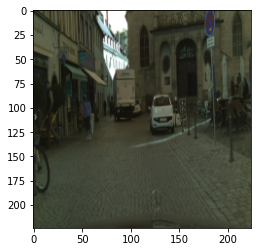

In [19]:
plt.imshow(x.permute(0,2,3,1)[i].int())

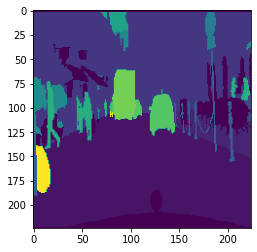

In [20]:
plt.imshow(y.permute(0,2,3,1)[i])

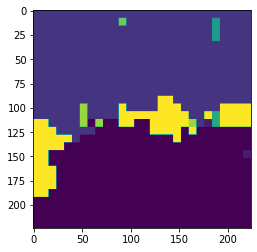

In [21]:
# seg
def resize_pred(pred, gt):
    return F.interpolate(pred, size=gt.shape[-2:])
pred = output
gt = y.cuda()
output = resize_pred(pred, gt)
prediction = torch.argmax(output, dim=1)
plt.imshow(prediction.cpu().detach().numpy()[i])

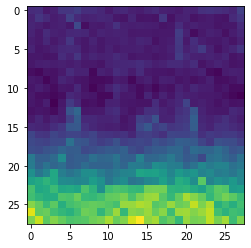

In [31]:
# depth
plt.imshow(output.cpu().detach().numpy()[i,0])

# Others

In [12]:
mtlmodel.net[0].taskOp.segment_semantic.weight

Parameter containing:
tensor([[[[ 1.9348e-01,  1.9046e-01,  1.7868e-01,  ...,  1.6289e-01,
            1.3305e-01,  1.4691e-01],
          [ 1.1127e-01,  1.8490e-02, -1.9056e-02,  ...,  1.0792e-01,
            7.5129e-02,  2.6224e-02],
          [ 5.9161e-02,  1.2628e-01,  4.1456e-02,  ...,  4.8540e-02,
           -5.2689e-02, -2.5313e-02],
          ...,
          [-1.7076e-01, -1.6649e-01, -5.4048e-02,  ..., -4.0136e-02,
           -1.8000e-01, -5.5735e-02],
          [-9.9670e-02, -1.1982e-01, -4.6479e-02,  ..., -2.8480e-02,
           -1.6647e-01, -4.2167e-02],
          [-1.4900e-02, -1.7457e-01, -1.2356e-01,  ..., -1.2068e-01,
           -1.8828e-01, -1.7409e-01]],

         [[ 3.9546e-01,  2.6007e-01,  3.0369e-01,  ...,  3.1506e-01,
            2.8149e-01,  3.6778e-01],
          [ 2.1045e-01,  1.4817e-01,  1.9734e-01,  ...,  2.0418e-01,
            2.5394e-01,  2.3090e-01],
          [ 2.2047e-01,  7.8727e-02,  2.1716e-01,  ...,  2.0573e-01,
            2.2162e-01,  1.1520e-01]

In [13]:
mtlmodel.net[0].taskOp.depth_zbuffer.weight

Parameter containing:
tensor([[[[-1.8881e-03,  1.8505e-02,  4.4373e-02,  ..., -1.2325e-02,
           -4.9379e-02, -4.5097e-02],
          [ 9.0981e-02,  4.1538e-02,  2.7948e-02,  ...,  1.1081e-01,
            5.2511e-02, -2.9954e-02],
          [ 8.2137e-02,  1.5644e-01,  7.6825e-02,  ...,  5.3679e-02,
           -4.4415e-02, -1.1095e-02],
          ...,
          [ 7.3310e-03,  6.0403e-03,  1.1486e-01,  ...,  1.0638e-01,
           -2.8108e-02,  1.0947e-01],
          [ 4.7898e-02,  2.8627e-02,  1.0086e-01,  ...,  9.8602e-02,
           -4.2270e-02,  8.3925e-02],
          [ 1.5200e-01, -1.0719e-03,  4.9900e-02,  ...,  3.8274e-02,
           -4.1196e-02, -3.8045e-02]],

         [[ 1.4453e-01,  2.7311e-02,  1.0204e-01,  ...,  4.7457e-02,
            3.2276e-03,  7.7583e-02],
          [ 7.5282e-02,  4.6295e-02,  1.1917e-01,  ...,  7.4346e-02,
            8.8846e-02,  3.4213e-02],
          [ 1.2747e-01,  6.2407e-04,  1.4398e-01,  ...,  8.4125e-02,
            9.4608e-02, -9.4846e-03]

In [10]:
print(mtlmodel)

MTLModel(
  (headsDict): ModuleDict(
    (segment_semantic): ASPPHeadNode(
      (fc1): Classification_Module(
        (conv1): Conv2d(512, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(6, 6), dilation=(6, 6))
        (conv2): Conv2d(1024, 1024, kernel_size=(1, 1), stride=(1, 1))
        (conv3): Conv2d(1024, 19, kernel_size=(1, 1), stride=(1, 1))
        (relu): ReLU(inplace=True)
        (dropout): Dropout(p=0.5, inplace=False)
      )
      (fc2): Classification_Module(
        (conv1): Conv2d(512, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(12, 12), dilation=(12, 12))
        (conv2): Conv2d(1024, 1024, kernel_size=(1, 1), stride=(1, 1))
        (conv3): Conv2d(1024, 19, kernel_size=(1, 1), stride=(1, 1))
        (relu): ReLU(inplace=True)
        (dropout): Dropout(p=0.5, inplace=False)
      )
      (fc3): Classification_Module(
        (conv1): Conv2d(512, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(18, 18), dilation=(18, 18))
        (conv2): Conv2d(1024, 1024, 